In [2]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.3 MB 3.7 MB/s            
     |████████████████████████████████| 31.2 MB 65.3 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 4.4 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 193.6 MB 144.7 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.3 MB 18.8 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
import os

cwd=os.path.abspath('')
os.chdir('/mnt')
files=os.listdir(cwd)

In [2]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [3]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  \
0                    6000.0                        0.0   
1                    6600.0                        0.0   
2                    6000.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
..                      ...                        ...   
532                     0.0                        0.0   
533                     0.0                        0.0   
534                     0.0                        0.0   
535                     0.0                        0.0   
536                     0.0                        0.0   

     K_as_Potassium_kg_per_Ha  Soil_Organic_Matter  Yield_Mass_kg_Per_Ha  \
0                      6000.0              2.50000           4786.900000   
1                      6600.0              2.50000           5234.476190   
2                      6000.0              2.50000           4358.380952   
3                         0.0              2.50000           3400.400000   
4                         0.0              2.50000           3033.000000   
..                        ...                  ...                   ...   
532                       0.0              1.82500           3780.000000   
533                       0.0              1.51828           3780.000000   
534                       0.0              3.20000           3300.000000   
535                       0.0              3.40000           3000.000000   
536                       0.0              3.00000           2760.000000   

     CO2_kg_Emissions_per_Ha  Crop_Protection_Application_Doses  
0                     349.85                                 14  
1                     488.41                                 18  
2                     462.26                                 20  
3                     409.14                                 10  
4                     261.38                                 15  
..                       ...                                ...  
532                    -7.88                                 17  
533                   157.50                                 17  
534                   -53.86                                 20  
535                  -550.94                                 22  
536                   158.85                                 23  

[537 rows x 7 columns]

None


Text(0.5, 1.0, 'Soil Organic Matter')

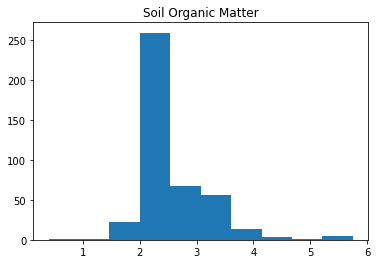

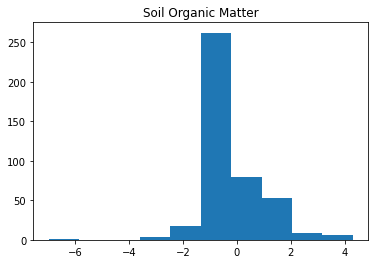

In [72]:
#Yeo-Johnson and Box Cox Transformation, water < 400
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#filtering by water applied
df = df[df['Total_Water_Applied_mm'] < 400]
df = df.drop(columns = ['Total_Water_Applied_mm']).reset_index(drop = True)
print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
# plt.title('Nitrate')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
# plt.title('Phosphorus')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])
# plt.title('Potassium')
plt.figure()
plt.hist(X_train_yield_kg_per_ha['Soil_Organic_Matter'])
plt.title('Soil Organic Matter')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['CO2_kg_Emissions_per_Ha'])
# plt.title('CO2')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['Total_Water_Applied_mm'])
# plt.title('Total Water Applied')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['Crop_Protection_Application_Doses'])
# plt.title('Crop Protection')

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

# plt.figure()
# plt.hist(y_train_yield_per_ha)
# plt.title('yield')

mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)

y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
# plt.title('Nitrate')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
# plt.title('Phosphorus')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])
# plt.title('Potassium')
plt.figure()
plt.hist(X_train_yield_kg_per_ha['Soil_Organic_Matter'])
plt.title('Soil Organic Matter')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['CO2_kg_Emissions_per_Ha'])
# plt.title('CO2')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['Total_Water_Applied_mm'])
# plt.title('Total Water Applied')
# plt.figure()
# plt.hist(X_train_yield_kg_per_ha['Crop_Protection_Application_Doses'])
# plt.title('Crop Protection')
# plt.figure()
# plt.hist(y_train_yield_per_ha)
# plt.title('yield')

KeyError: 'Total_Water_Applied_mm_per_Ha'

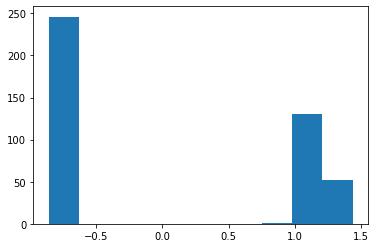

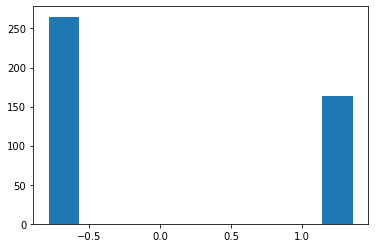

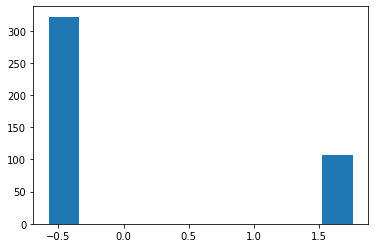

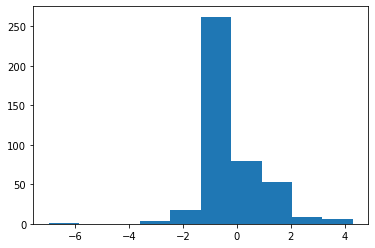

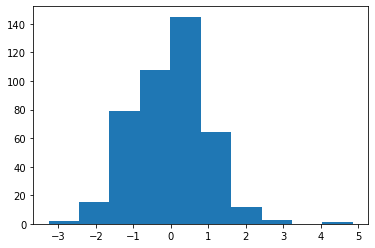

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure()
plt.hist(X_train_yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
plt.figure()
plt.hist(X_train_yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
plt.figure()
plt.hist(X_train_yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])
plt.figure()
plt.hist(X_train_yield_kg_per_ha['Soil_Organic_Matter'])
plt.figure()
plt.hist(X_train_yield_kg_per_ha['CO2_kg_Emissions_per_Ha'])
plt.figure()
plt.hist(X_train_yield_kg_per_ha['Total_Water_Applied_mm_per_Ha'])
plt.figure()
plt.hist(X_train_yield_kg_per_ha['Crop_Protection_Application_Doses'])
plt.figure()
plt.hist(y_train_yield_per_ha)

In [73]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:11:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 833.1067573651925
MAE Scaled on test data: 0.24200958625971586


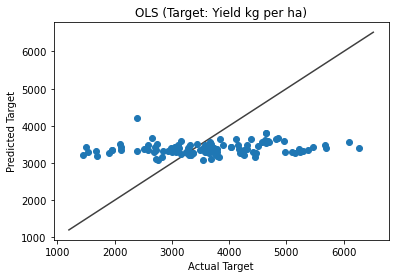

Lasso
MAE on test data: 833.0322990673286
MAE Scaled on test data: 0.24198795683263422


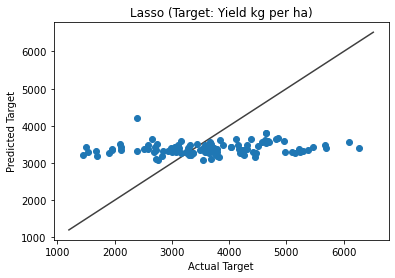

Ridge
MAE on test data: 832.8887139832322
MAE Scaled on test data: 0.24194624673187218


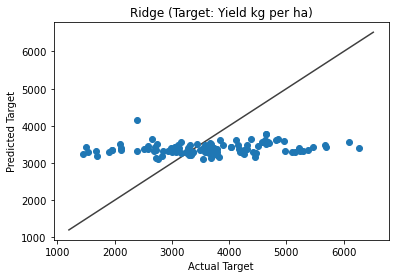

ElasticNet
MAE on test data: 833.0413421442106
MAE Scaled on test data: 0.24199058376042634


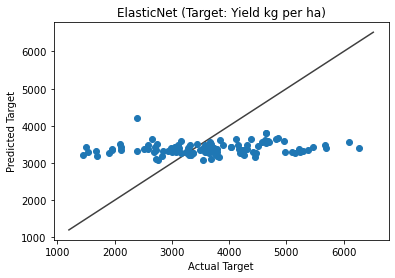

SVR
MAE on test data: 829.6073309646195
MAE Scaled on test data: 0.2409930361863166


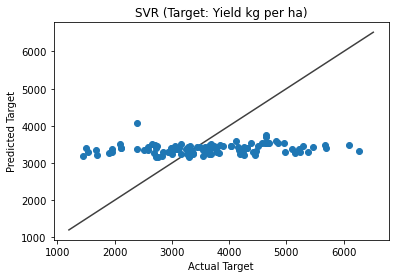

Lightgbm
MAE on test data: 819.2506184305012
MAE Scaled on test data: 0.23798450973609347


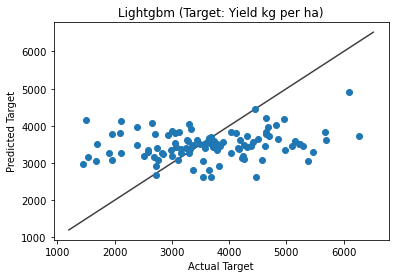

GBR
MAE on test data: 850.1546237071634
MAE Scaled on test data: 0.24696182922684712


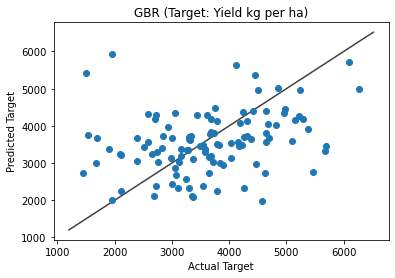

XGBoost
MAE on test data: 824.3266455338004
MAE Scaled on test data: 0.23945904731276335


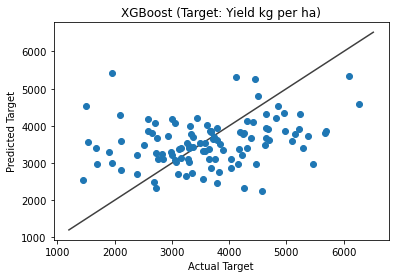

stackgen
MAE on test data: 852.4460754452303
MAE Scaled on test data: 0.2476274741542962


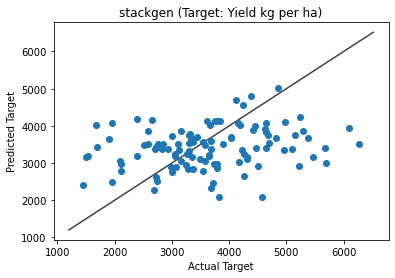

In [74]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

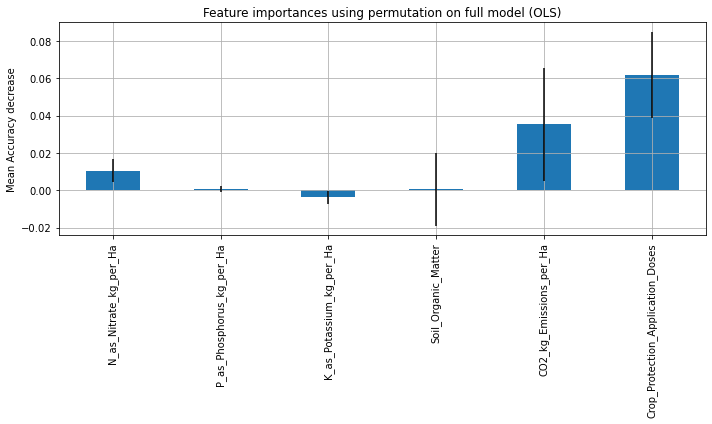

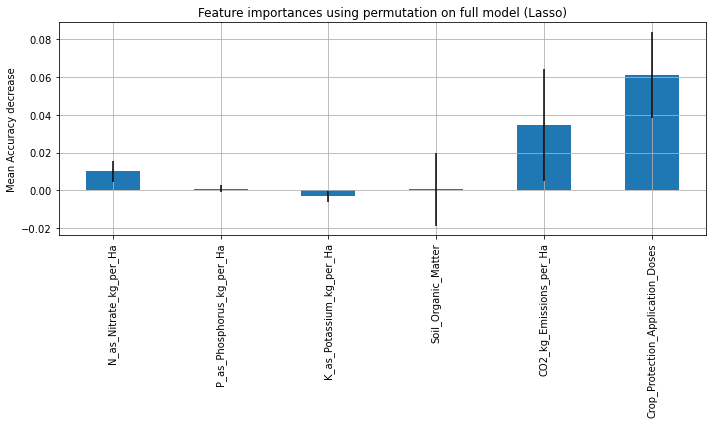

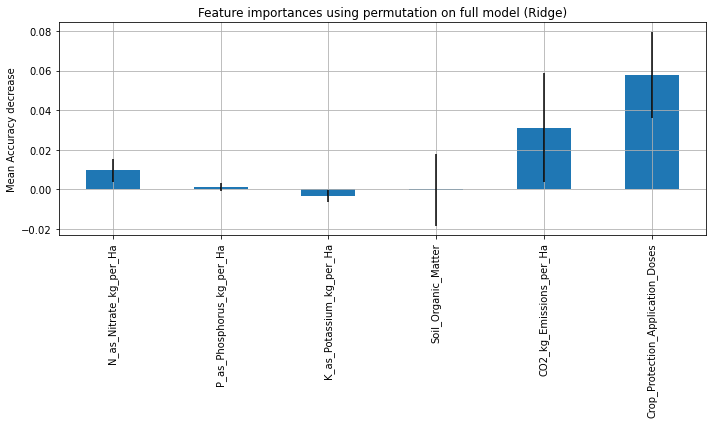

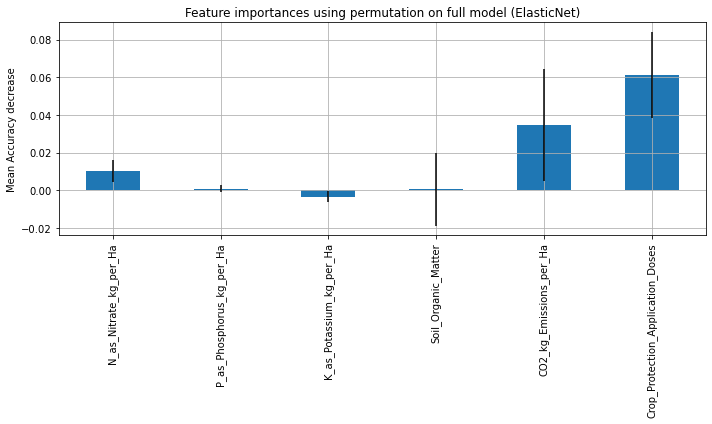

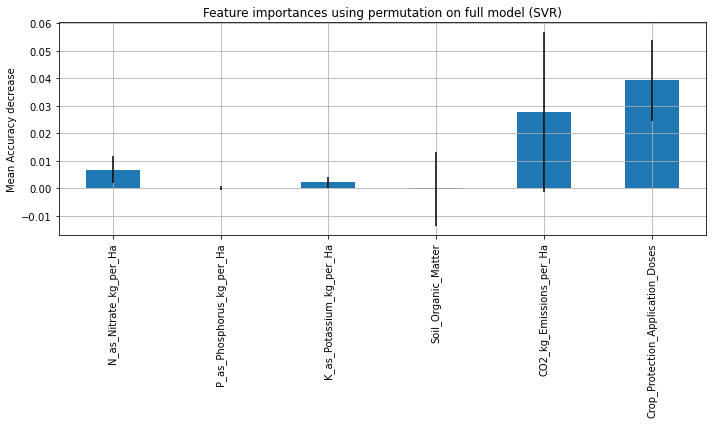

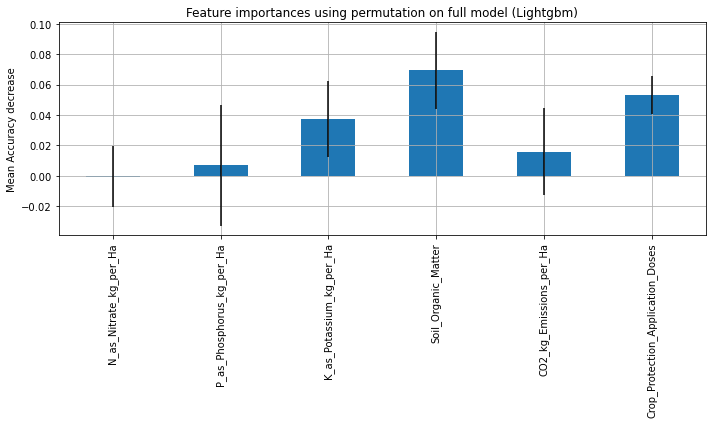

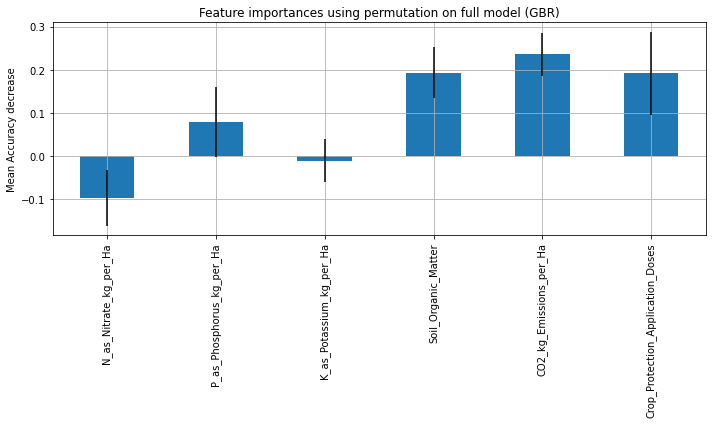

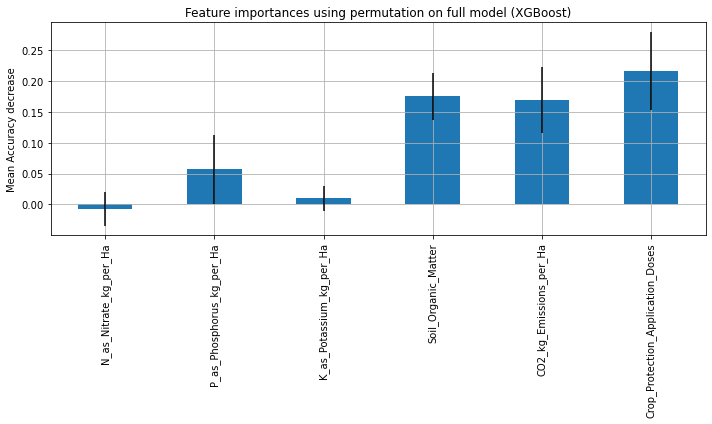

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names

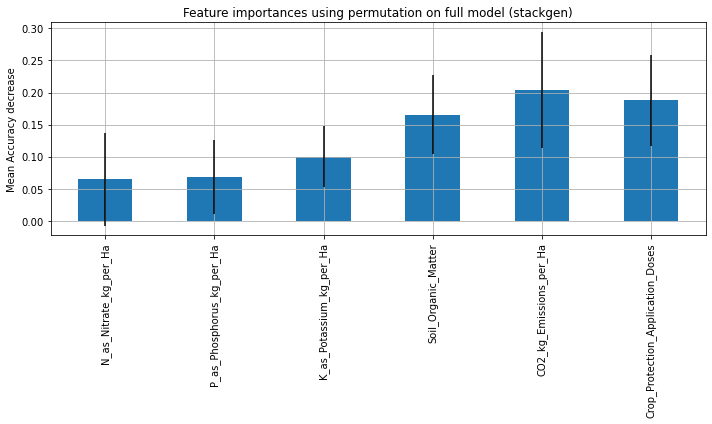

In [75]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [76]:
#Yeo-Johnson and Box Cox Transformation, water > 400
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#filtering by water applied
df = df[df['Total_Water_Applied_mm'] > 400]
df = df.drop(columns = ['Total_Water_Applied_mm']).reset_index(drop = True)
print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()

y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)

y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  \
0                    2100.0                     9660.0   
1                    2100.0                     9660.0   
2                    2100.0                     9660.0   
3                    2600.0                    11960.0   
4                    2100.0                     9660.0   
..                      ...                        ...   
434                     0.0                        0.0   
435                     0.0                        0.0   
436                     0.0                        0.0   
437                     0.0                        0.0   
438                     0.0                        0.0   

     K_as_Potassium_kg_per_Ha  Soil_Organic_Matter  Yield_Mass_kg_Per_Ha  \
0                         0.0             2.960000           2450.000000   
1                         0.0             2.795556           2763.786408   
2                         0.0             3.659375           1865.512821   
3                         0.0             3.709375           2172.337662   
4                         0.0             2.822917           3411.034483   
..                        ...                  ...                   ...   
434                       0.0             2.690000           4587.384615   
435                       0.0             5.380000           6741.676647   
436                       0.0             5.380000           6482.275449   
437                       0.0             3.750000           3372.689076   
438                       0.0             2.860000           4358.666667   

     CO2_kg_Emissions_per_Ha  Crop_Protection_Application_Doses  
0                    1497.96                                 31  
1                     790.11                                 23  
2                      79.62                                 27  
3                     218.76                                 28  
4                     905.01                                 24  
..                       ...                                ...  
434                   449.67                                 16  
435                 -1035.15                                 15  
436                 -1092.21                                 13  
437                  -427.99                                 15  
438                   417.60                                 20  

[439 rows x 7 columns]

None


In [77]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:15:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 1111.6188474631879
MAE Scaled on test data: 0.3046742105821604


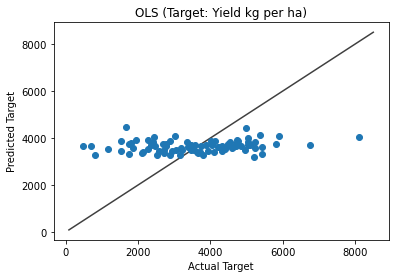

Lasso
MAE on test data: 1111.8338727393077
MAE Scaled on test data: 0.3047331450419408


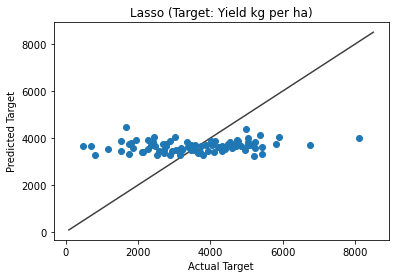

Ridge
MAE on test data: 1112.1425123663175
MAE Scaled on test data: 0.30481773746759844


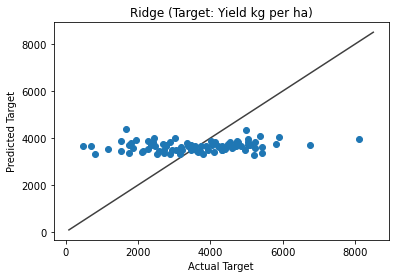

ElasticNet
MAE on test data: 1111.806894516008
MAE Scaled on test data: 0.30472575080883163


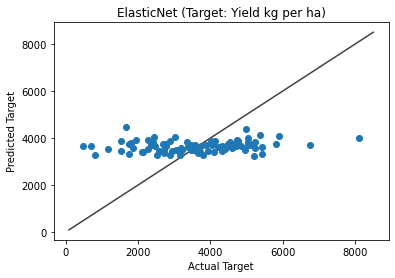

SVR
MAE on test data: 1127.0221536876904
MAE Scaled on test data: 0.3088959725422202


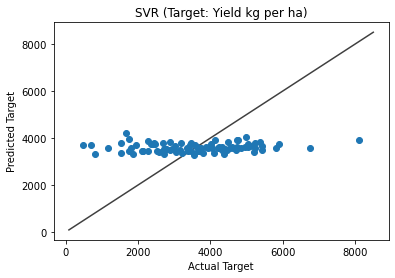

Lightgbm
MAE on test data: 1072.5712200557539
MAE Scaled on test data: 0.2939719765541787


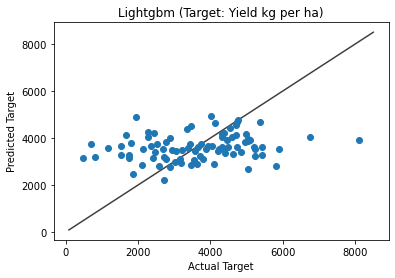

GBR
MAE on test data: 1199.0966967572792
MAE Scaled on test data: 0.3286502746241881


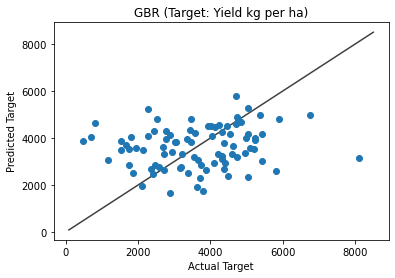

XGBoost
MAE on test data: 1078.508979407076
MAE Scaled on test data: 0.29559940680792024


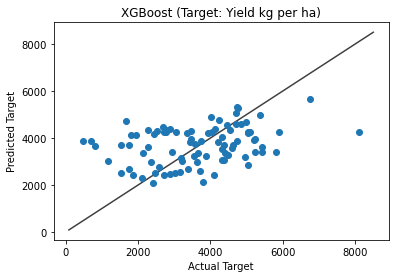

stackgen
MAE on test data: 1196.3961749742632
MAE Scaled on test data: 0.327910111443006


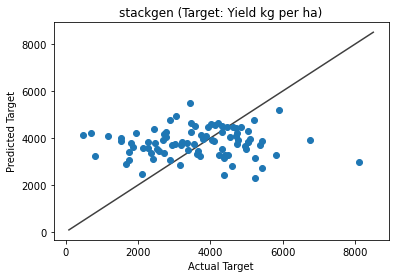

In [78]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

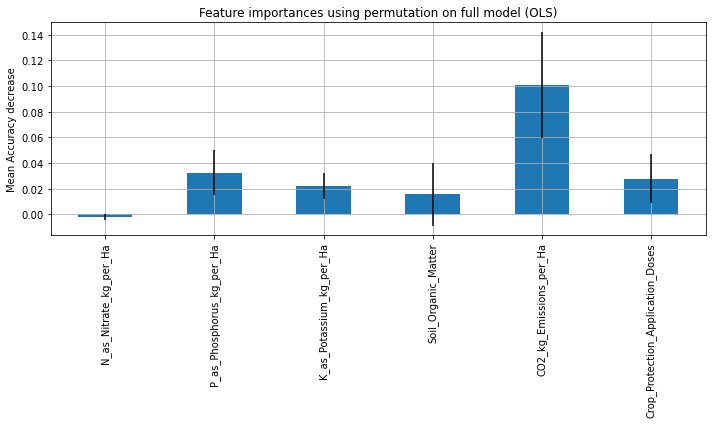

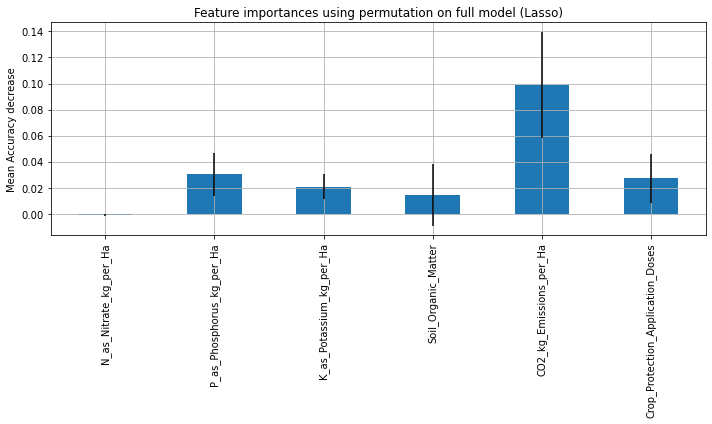

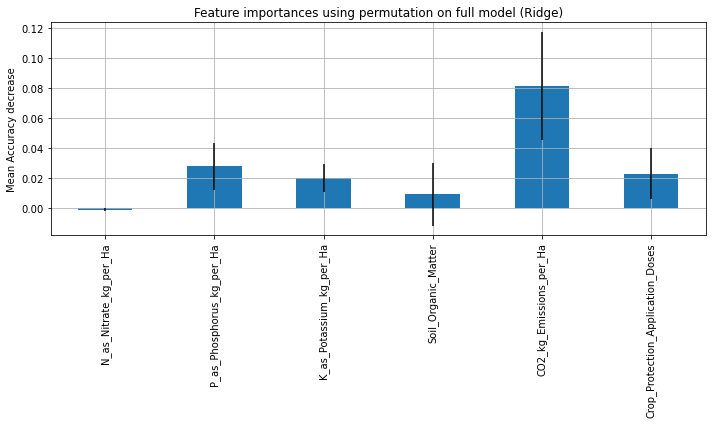

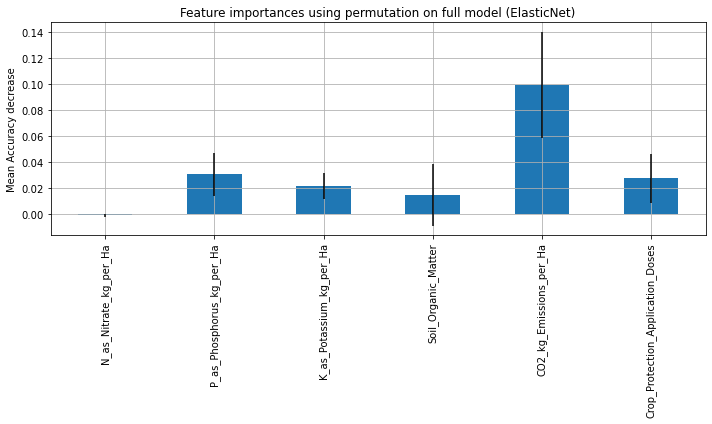

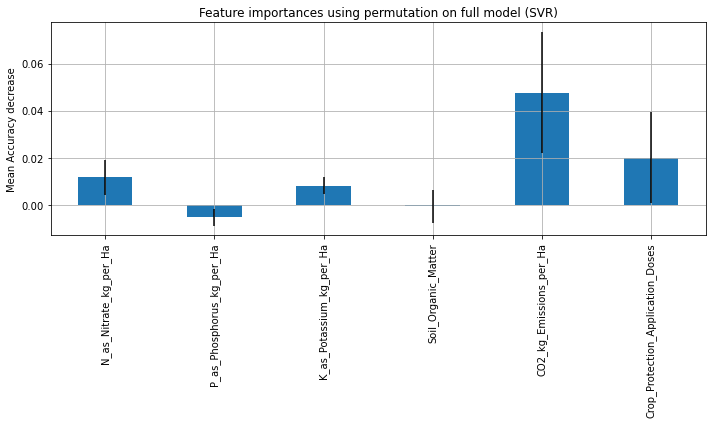

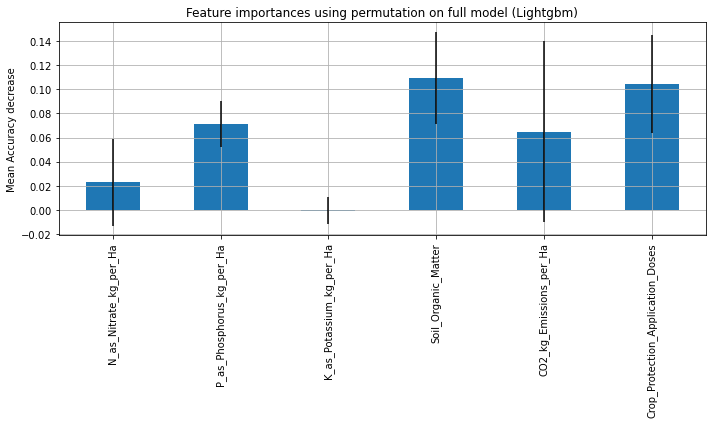

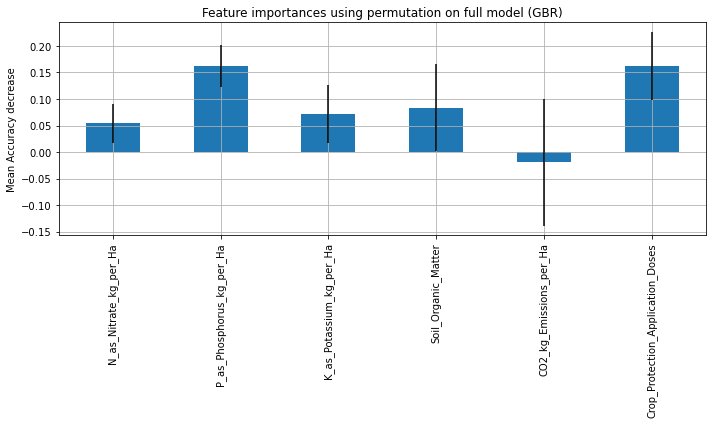

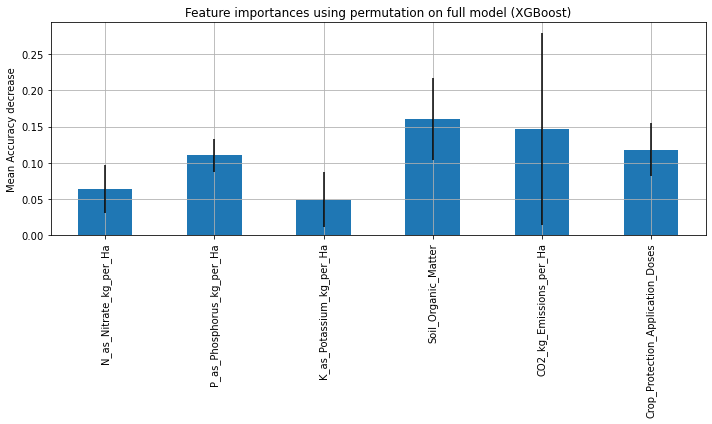

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names

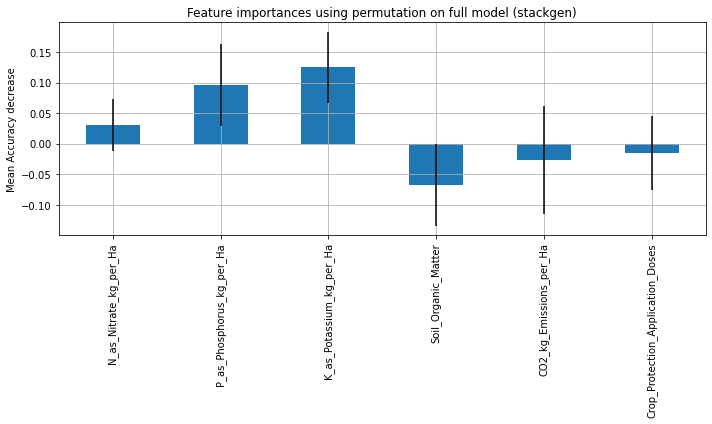

In [79]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [80]:
#Yeo-Johnson and Box Cox Transformation, no water column
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#removing water applied
df = df.drop(columns = ['Total_Water_Applied_mm']).reset_index(drop = True)
print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()

y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)

y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  \
0                    6000.0                        0.0   
1                    6600.0                        0.0   
2                    6000.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
..                      ...                        ...   
971                     0.0                        0.0   
972                     0.0                        0.0   
973                     0.0                        0.0   
974                     0.0                        0.0   
975                     0.0                        0.0   

     K_as_Potassium_kg_per_Ha  Soil_Organic_Matter  Yield_Mass_kg_Per_Ha  \
0                      6000.0                 2.50           4786.900000   
1                      6600.0                 2.50           5234.476190   
2                      6000.0                 2.50           4358.380952   
3                         0.0                 2.50           3400.400000   
4                         0.0                 2.50           3033.000000   
..                        ...                  ...                   ...   
971                       0.0                 2.69           4587.384615   
972                       0.0                 5.38           6741.676647   
973                       0.0                 5.38           6482.275449   
974                       0.0                 3.75           3372.689076   
975                       0.0                 2.86           4358.666667   

     CO2_kg_Emissions_per_Ha  Crop_Protection_Application_Doses  
0                     349.85                                 14  
1                     488.41                                 18  
2                     462.26                                 20  
3                     409.14                                 10  
4                     261.38                                 15  
..                       ...                                ...  
971                   449.67                                 16  
972                 -1035.15                                 15  
973                 -1092.21                                 13  
974                  -427.99                                 15  
975                   417.60                                 20  

[976 rows x 7 columns]

None


In [81]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:19:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 920.7810058439013
MAE Scaled on test data: 0.25662229694990174


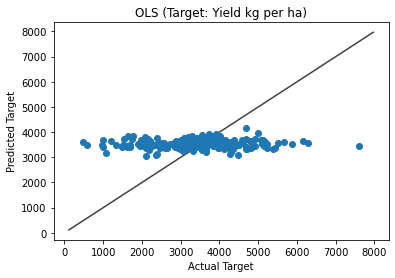

Lasso
MAE on test data: 920.7704252552678
MAE Scaled on test data: 0.2566193481326032


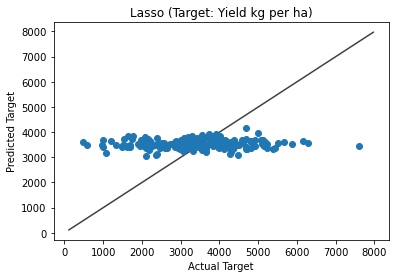

Ridge
MAE on test data: 920.3950803966766
MAE Scaled on test data: 0.256514739263449


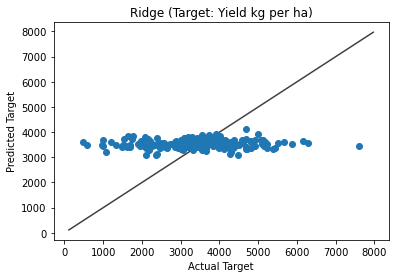

ElasticNet
MAE on test data: 920.7636574963443
MAE Scaled on test data: 0.2566174619535561


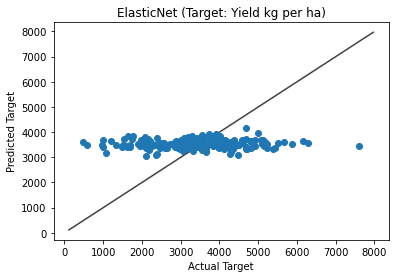

SVR
MAE on test data: 923.2314231431451
MAE Scaled on test data: 0.257305229929434


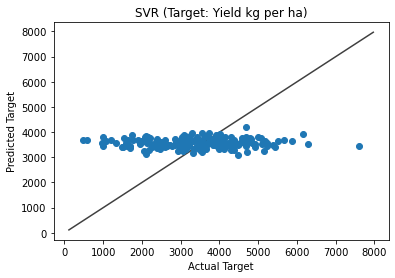

Lightgbm
MAE on test data: 938.4942638221526
MAE Scaled on test data: 0.2615589940798332


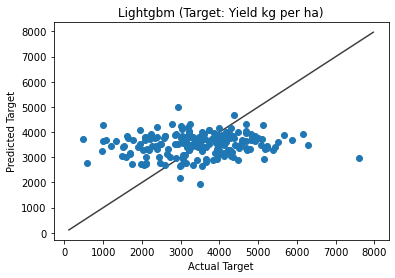

GBR
MAE on test data: 947.3333235282051
MAE Scaled on test data: 0.2640224460735737


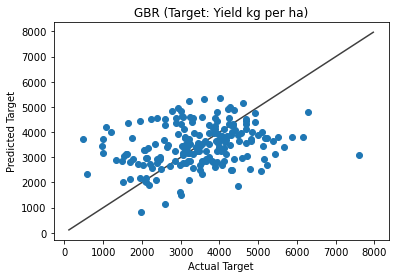

XGBoost
MAE on test data: 867.700408782334
MAE Scaled on test data: 0.24182869819519318


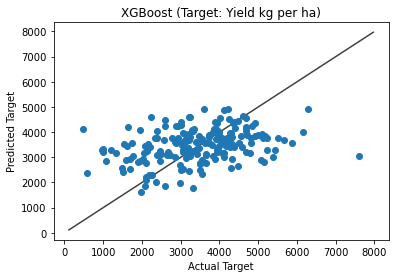

stackgen
MAE on test data: 942.1482006507199
MAE Scaled on test data: 0.2625773487764501


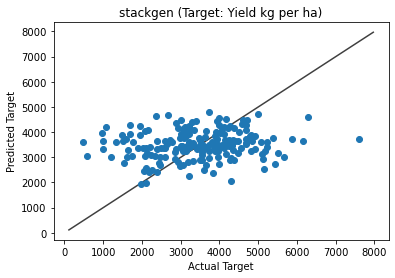

In [82]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

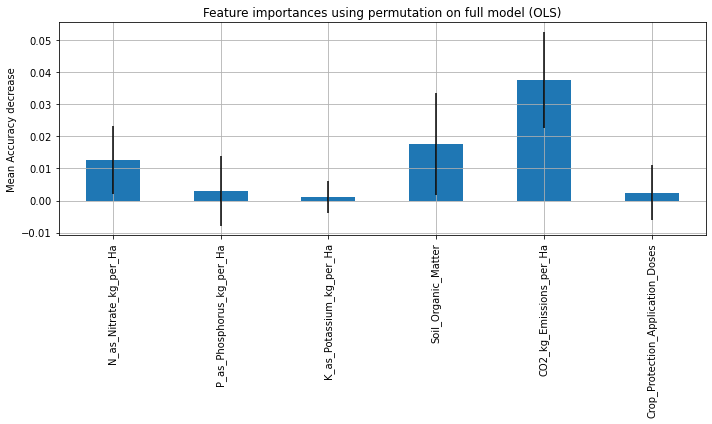

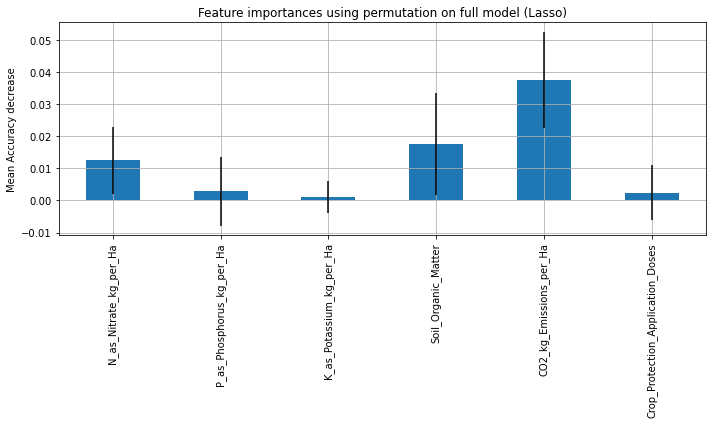

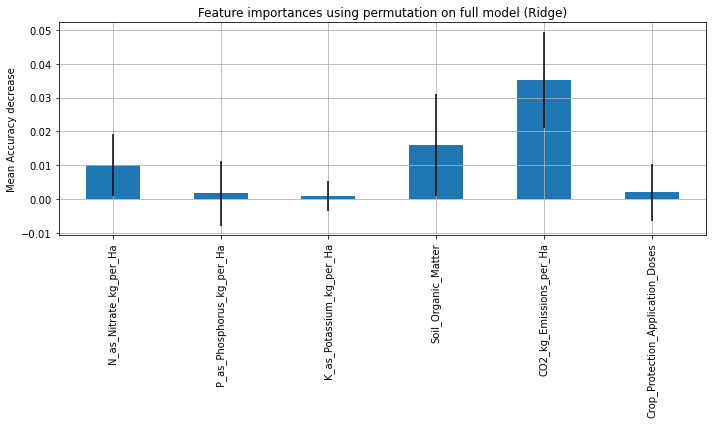

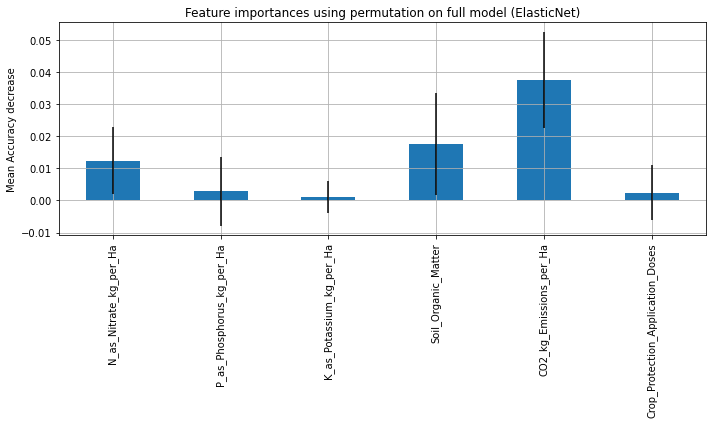

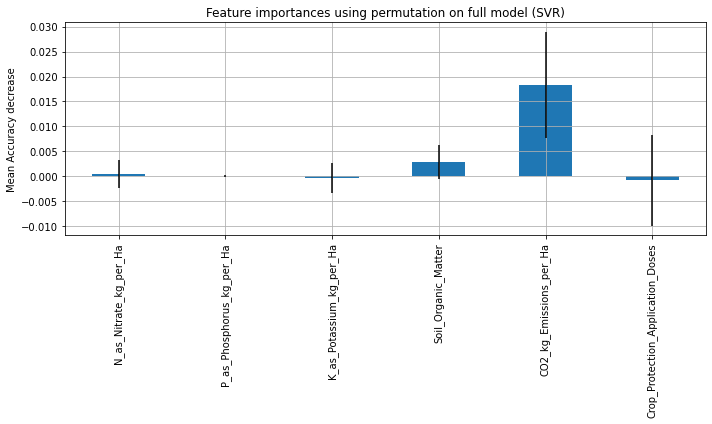

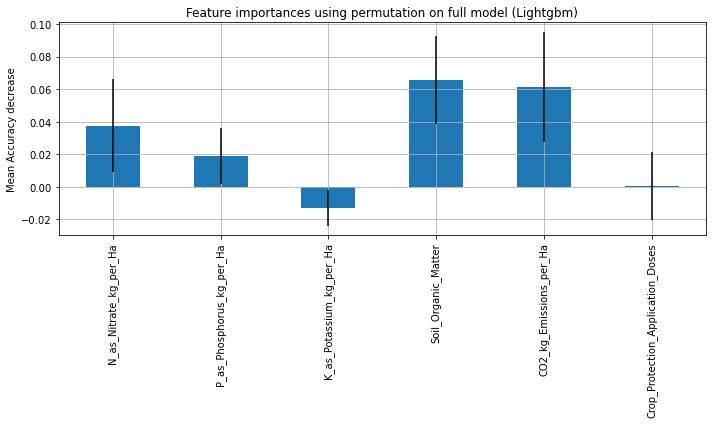

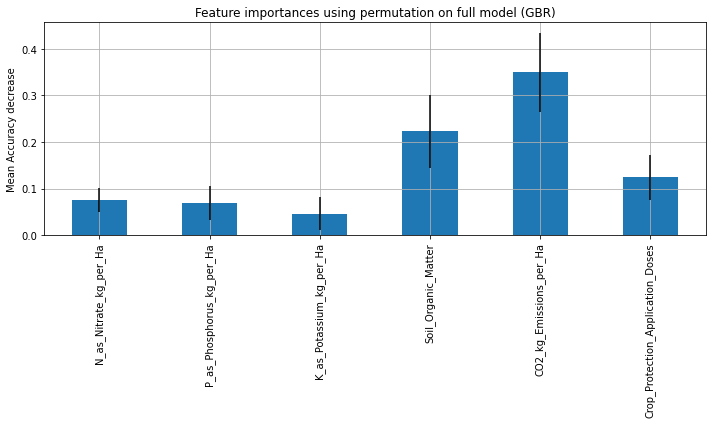

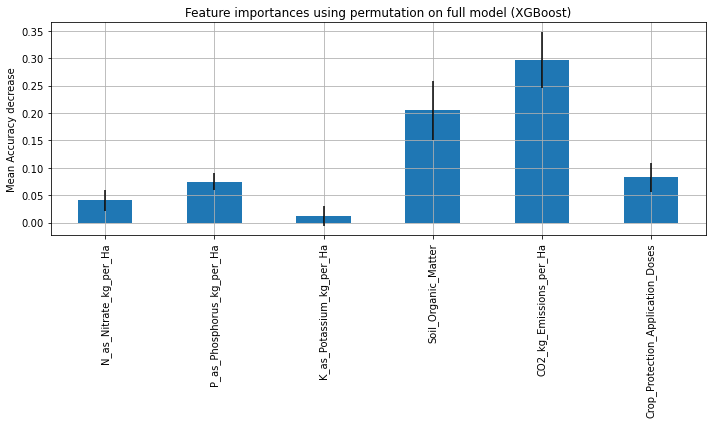

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names

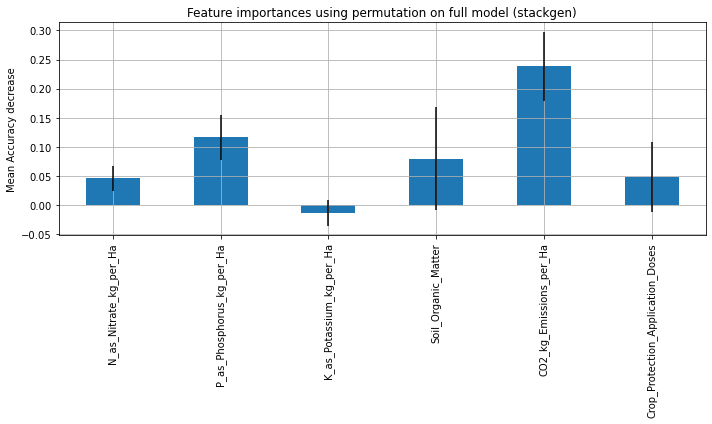

In [83]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [84]:
#Yeo-Johnson and Box Cox Transformation, water column retained
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  \
0                    6000.0                        0.0   
1                    6600.0                        0.0   
2                    6000.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
..                      ...                        ...   
971                     0.0                        0.0   
972                     0.0                        0.0   
973                     0.0                        0.0   
974                     0.0                        0.0   
975                     0.0                        0.0   

     K_as_Potassium_kg_per_Ha  Soil_Organic_Matter  Yield_Mass_kg_Per_Ha  \
0                      6000.0                 2.50           4786.900000   
1                      6600.0                 2.50           5234.476190   
2                      6000.0                 2.50           4358.380952   
3                         0.0                 2.50           3400.400000   
4                         0.0                 2.50           3033.000000   
..                        ...                  ...                   ...   
971                       0.0                 2.69           4587.384615   
972                       0.0                 5.38           6741.676647   
973                       0.0                 5.38           6482.275449   
974                       0.0                 3.75           3372.689076   
975                       0.0                 2.86           4358.666667   

     CO2_kg_Emissions_per_Ha  Total_Water_Applied_mm  \
0                     349.85                     350   
1                     488.41                     350   
2                     462.26                     350   
3                     409.14                     350   
4                     261.38                     350   
..                       ...                     ...   
971                   449.67                     450   
972                 -1035.15                     450   
973                 -1092.21                     450   
974                  -427.99                     450   
975                   417.60                     450   

     Crop_Protection_Application_Doses  
0                                   14  
1                                   18  
2                                   20  
3                                   10  
4                                   15  
..                                 ...  
971                                 16  
972                                 15  
973                                 13  
974                                 15  
975                                 20  

[976 rows x 8 columns]

None


In [85]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[7], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:22:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 917.6550777991332
MAE Scaled on test data: 0.2557510986629504


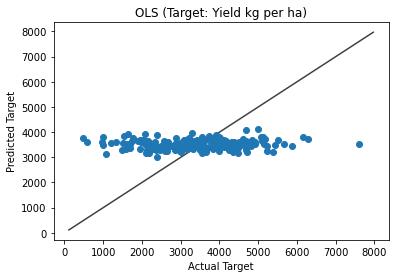

Lasso
MAE on test data: 917.6555771491965
MAE Scaled on test data: 0.25575123783215503


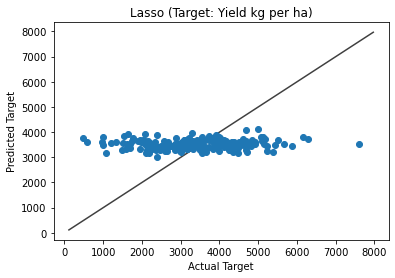

Ridge
MAE on test data: 917.6762695422483
MAE Scaled on test data: 0.25575700481627034


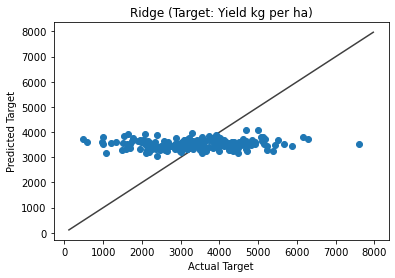

ElasticNet
MAE on test data: 917.6558770370175
MAE Scaled on test data: 0.25575132141109613


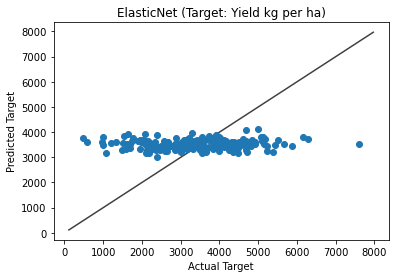

SVR
MAE on test data: 922.1060268848627
MAE Scaled on test data: 0.25699158122149335


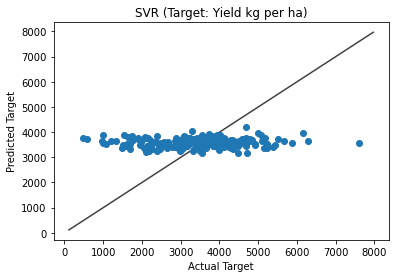

Lightgbm
MAE on test data: 931.7819669323508
MAE Scaled on test data: 0.25968827233955155


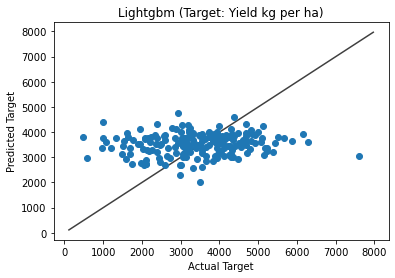

GBR
MAE on test data: 926.3845382129748
MAE Scaled on test data: 0.25818400525888974


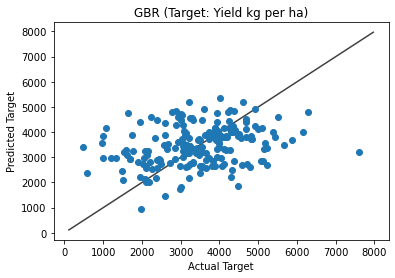

XGBoost
MAE on test data: 859.4331183603567
MAE Scaled on test data: 0.2395245986925158


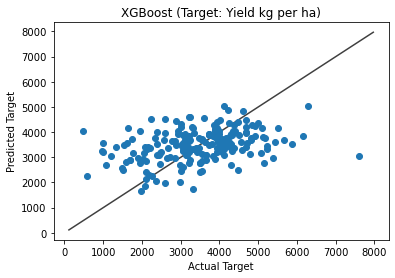

stackgen
MAE on test data: 973.5273391393251
MAE Scaled on test data: 0.2713227361640567


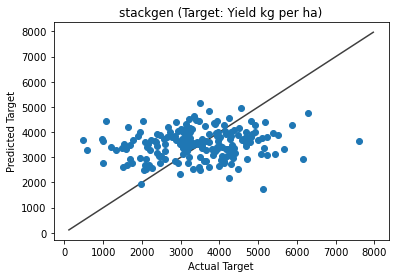

In [86]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

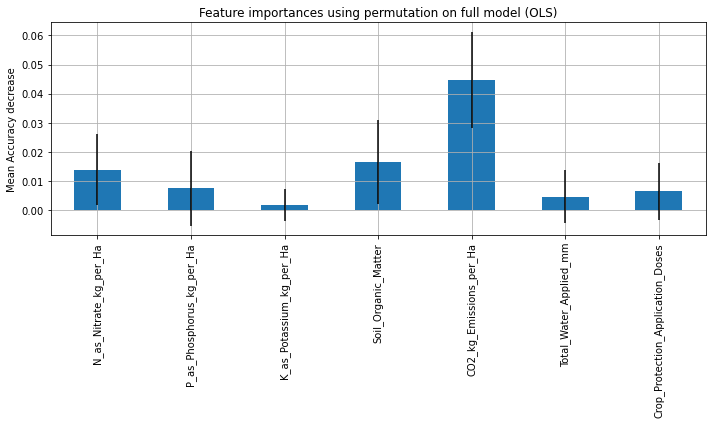

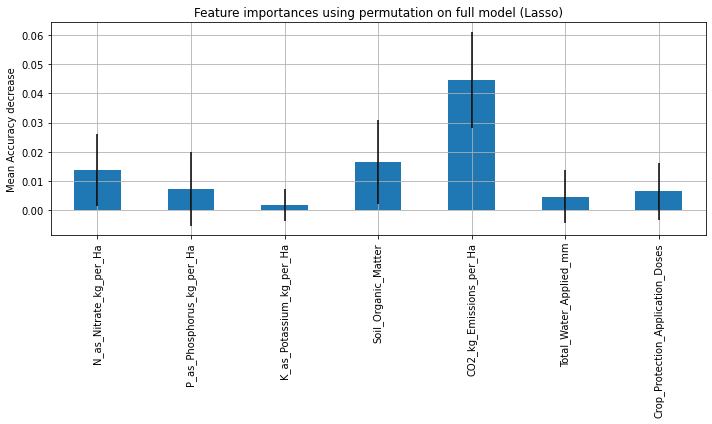

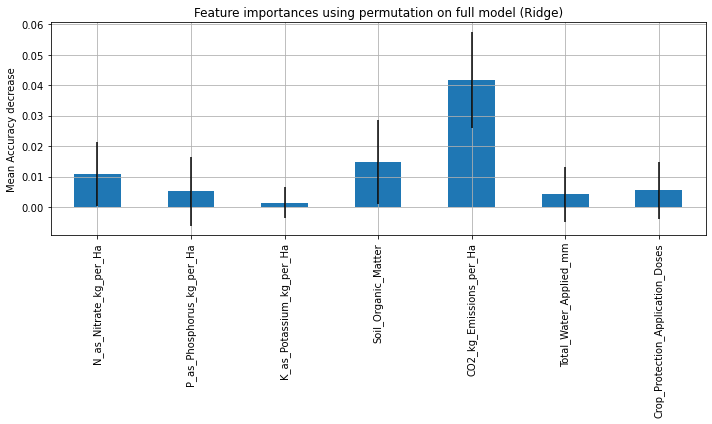

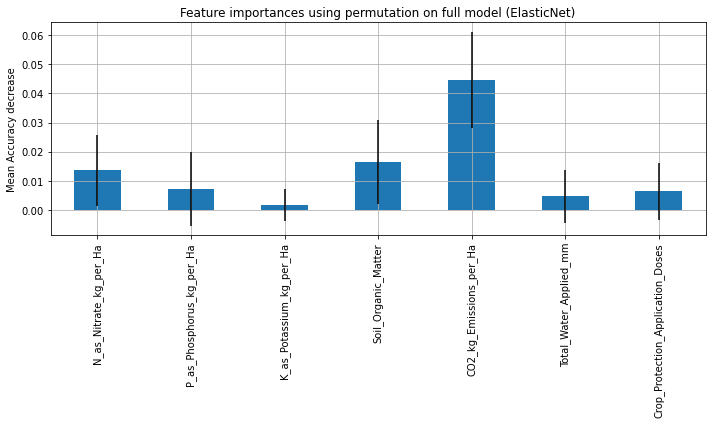

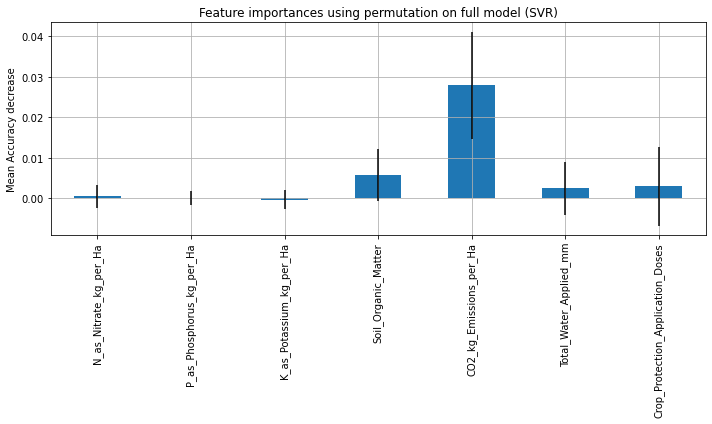

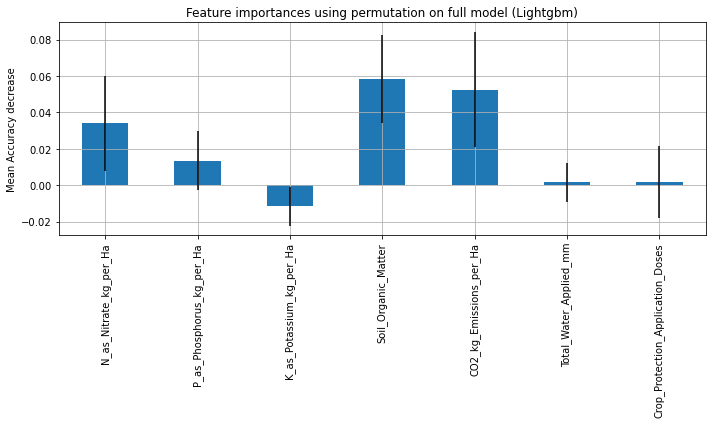

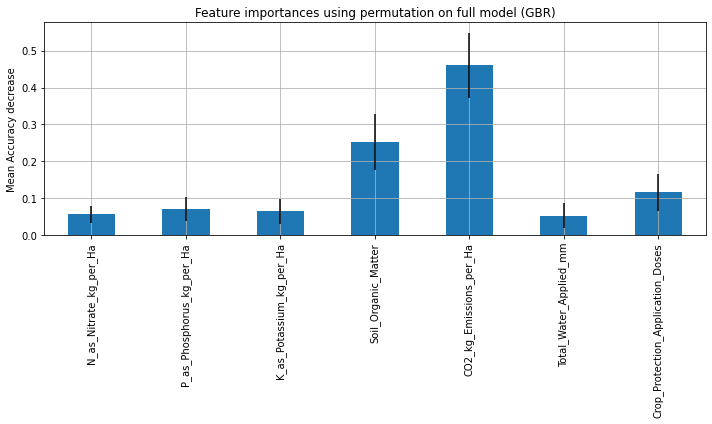

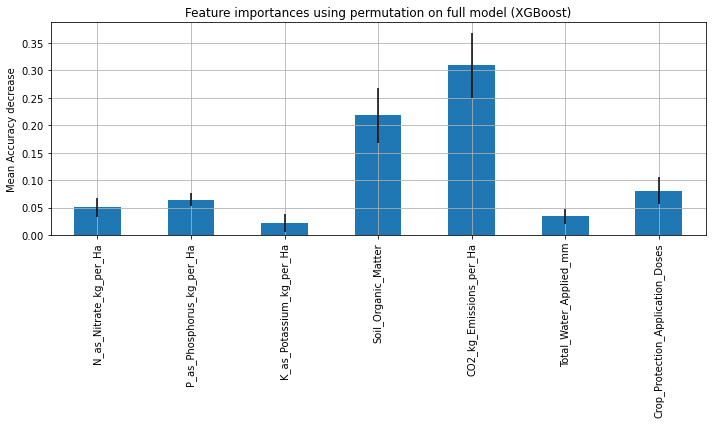

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names

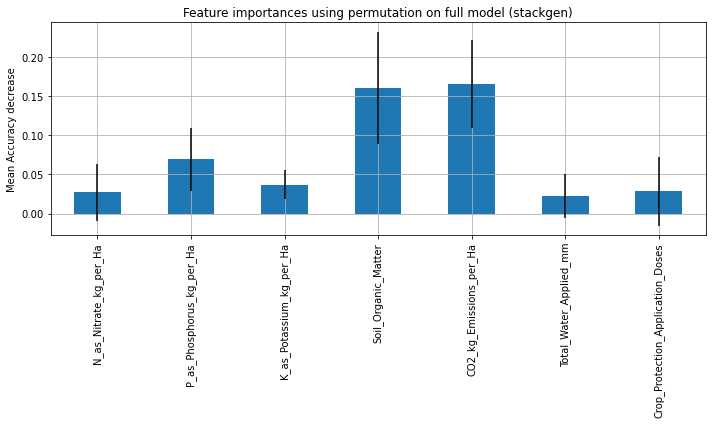

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names

In [87]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [91]:
#Yeo-Johnson and Box Cox Transformation, no water column, drop K as potassium (highly correlated with nitrate (.6), least important feature according to feature importance)
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#removing water applied and K
df = df.drop(columns = ['Total_Water_Applied_mm', 'K_as_Potassium_kg_per_Ha']).reset_index(drop = True)
print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()

y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)

y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  Soil_Organic_Matter  \
0                    6000.0                        0.0                 2.50   
1                    6600.0                        0.0                 2.50   
2                    6000.0                        0.0                 2.50   
3                       0.0                        0.0                 2.50   
4                       0.0                        0.0                 2.50   
..                      ...                        ...                  ...   
971                     0.0                        0.0                 2.69   
972                     0.0                        0.0                 5.38   
973                     0.0                        0.0                 5.38   
974                     0.0                        0.0                 3.75   
975                     0.0                        0.0                 2.86   

     Yield_Mass_kg_Per_Ha  CO2_kg_Emissions_per_Ha  \
0             4786.900000                   349.85   
1             5234.476190                   488.41   
2             4358.380952                   462.26   
3             3400.400000                   409.14   
4             3033.000000                   261.38   
..                    ...                      ...   
971           4587.384615                   449.67   
972           6741.676647                 -1035.15   
973           6482.275449                 -1092.21   
974           3372.689076                  -427.99   
975           4358.666667                   417.60   

     Crop_Protection_Application_Doses  
0                                   14  
1                                   18  
2                                   20  
3                                   10  
4                                   15  
..                                 ...  
971                                 16  
972                                 15  
973                                 13  
974                                 15  
975                                 20  

[976 rows x 6 columns]

None


In [92]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:44:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 921.5894976177539
MAE Scaled on test data: 0.2568476241609914


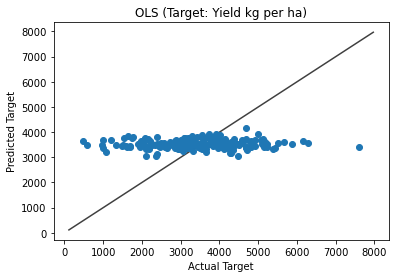

Lasso
MAE on test data: 921.5791729629932
MAE Scaled on test data: 0.25684474667263846


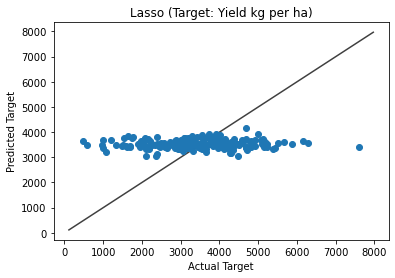

Ridge
MAE on test data: 921.3280819750323
MAE Scaled on test data: 0.25677476744232747


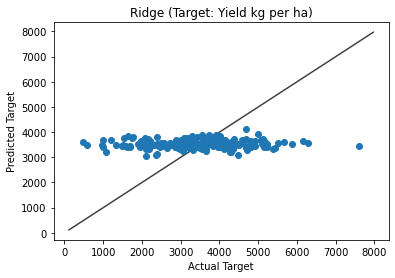

ElasticNet
MAE on test data: 921.5559008488772
MAE Scaled on test data: 0.2568382607184958


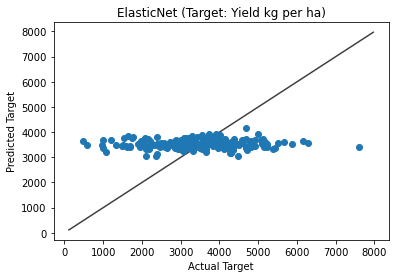

SVR
MAE on test data: 922.3058938967368
MAE Scaled on test data: 0.2570472842945869


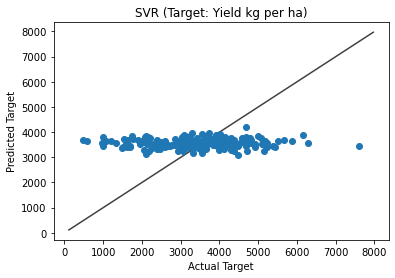

Lightgbm
MAE on test data: 933.7180875154784
MAE Scaled on test data: 0.2602278704720725


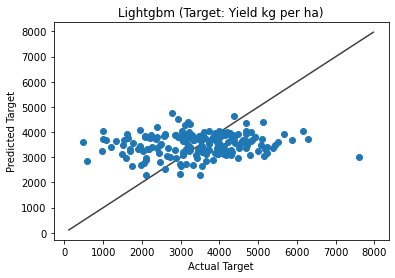

GBR
MAE on test data: 982.079486205533
MAE Scaled on test data: 0.27370622540857276


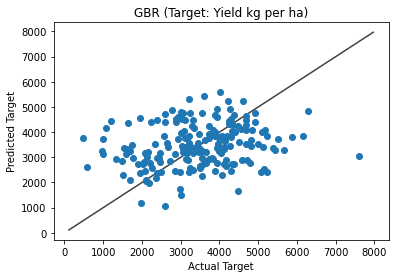

XGBoost
MAE on test data: 882.4535741367554
MAE Scaled on test data: 0.24594041548356563


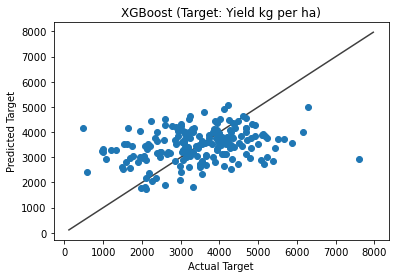

stackgen
MAE on test data: 983.9382066448728
MAE Scaled on test data: 0.2742242520680106


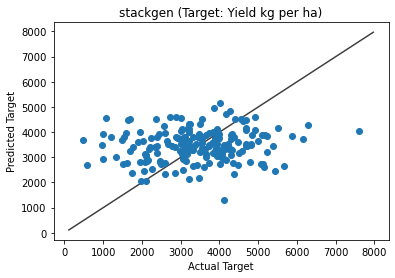

In [93]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

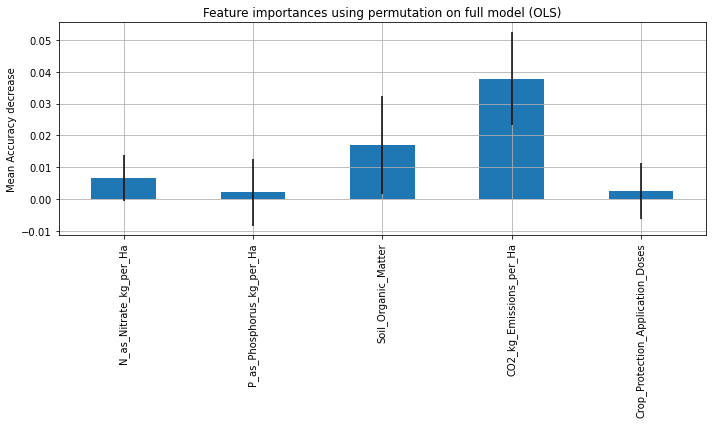

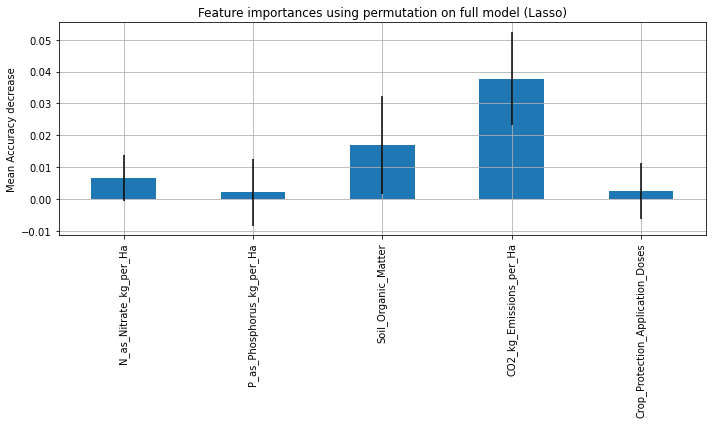

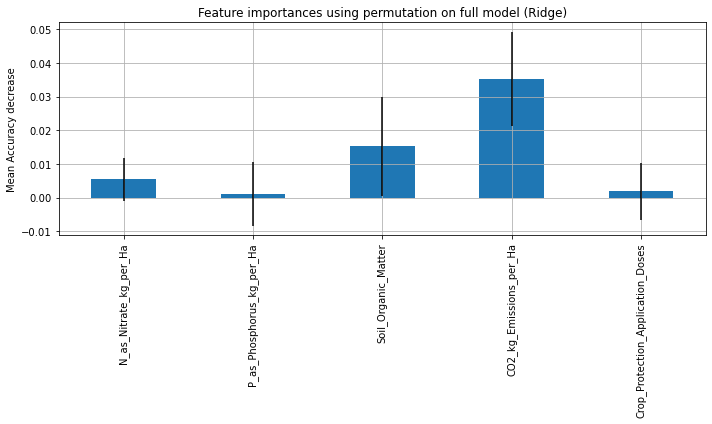

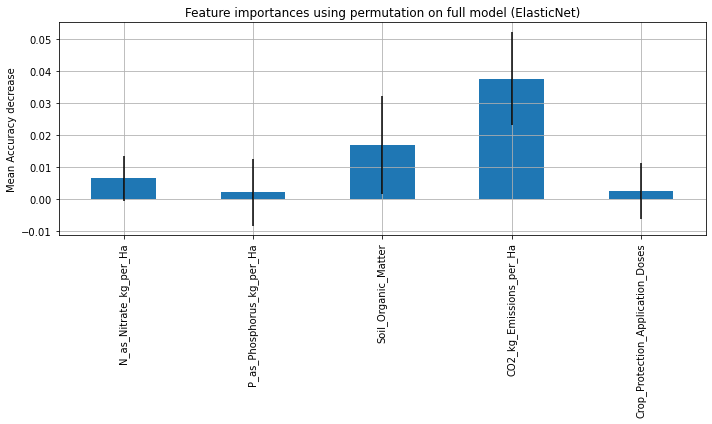

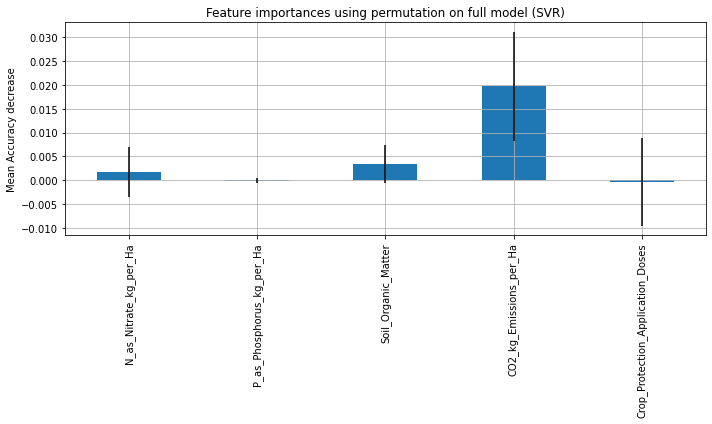

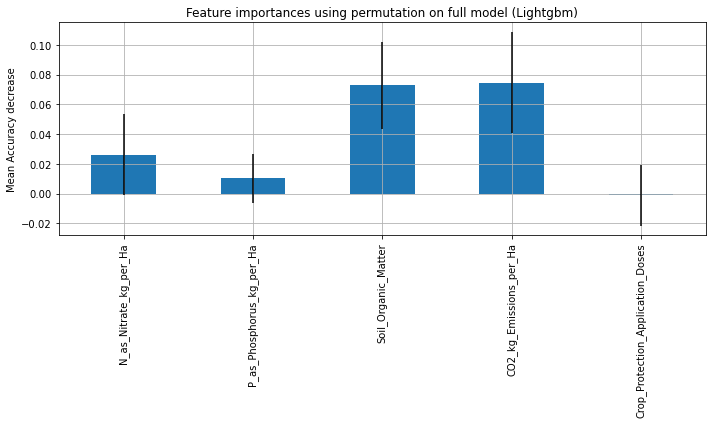

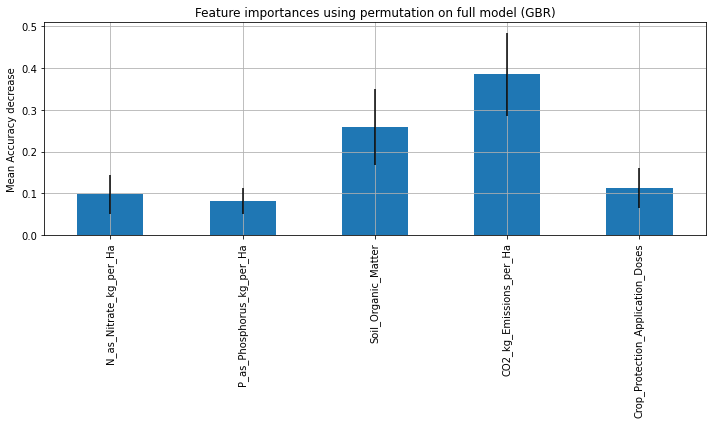

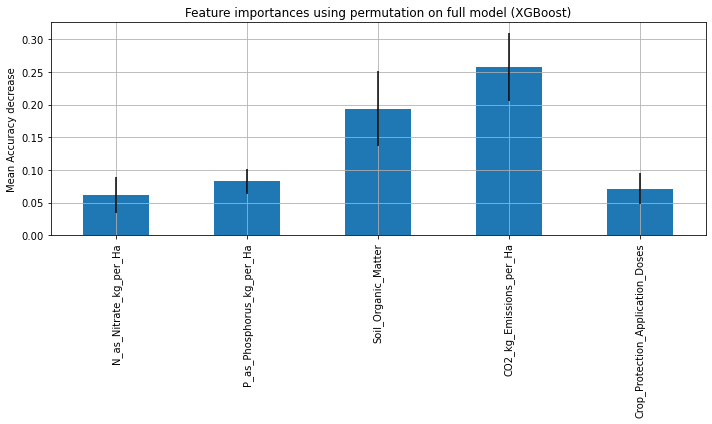

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names

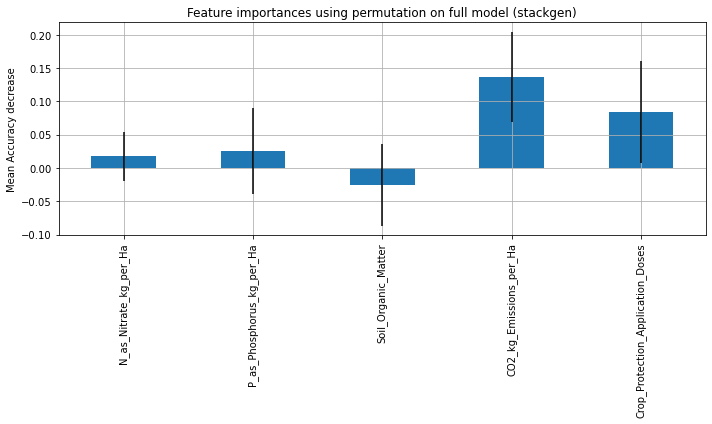

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names

In [94]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [24]:
#Yeo-Johnson and Box Cox Transformation
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name', 'Total_Water_Applied_mm'])

print(display(df))

#train/test split

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

# #x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_CO2 = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Total_Water_Applied_mm_per_Ha', 'Crop_Protection_Application_Doses']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Total_Water_Applied_mm_per_Ha', 'Crop_Protection_Application_Doses']] = \
power_transform_X_CO2.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Total_Water_Applied_mm_per_Ha', 'Crop_Protection_Application_Doses']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Total_Water_Applied_mm_per_Ha', 'Crop_Protection_Application_Doses']] = \
power_transform_X_CO2.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Total_Water_Applied_mm_per_Ha', 'Crop_Protection_Application_Doses']])


# #y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)
y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  \
0                    6000.0                        0.0   
1                    6600.0                        0.0   
2                    6000.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
..                      ...                        ...   
971                     0.0                        0.0   
972                     0.0                        0.0   
973                     0.0                        0.0   
974                     0.0                        0.0   
975                     0.0                        0.0   

     K_as_Potassium_kg_per_Ha  Soil_Organic_Matter  Yield_Mass_kg_Per_Ha  \
0                      6000.0                 2.50           4786.900000   
1                      6600.0                 2.50           5234.476190   
2                      6000.0                 2.50           4358.380952   
3                         0.0                 2.50           3400.400000   
4                         0.0                 2.50           3033.000000   
..                        ...                  ...                   ...   
971                       0.0                 2.69           4587.384615   
972                       0.0                 5.38           6741.676647   
973                       0.0                 5.38           6482.275449   
974                       0.0                 3.75           3372.689076   
975                       0.0                 2.86           4358.666667   

     CO2_kg_Emissions_per_Ha  Total_Water_Applied_mm_per_Ha  \
0                     349.85                       1.750000   
1                     488.41                       1.666667   
2                     462.26                       1.666667   
3                     409.14                       2.333333   
4                     261.38                       5.000000   
..                       ...                            ...   
971                   449.67                       6.923077   
972                 -1035.15                       5.389222   
973                 -1092.21                       5.389222   
974                  -427.99                       3.781513   
975                   417.60                       3.750000   

     Crop_Protection_Application_Doses  
0                             0.070000  
1                             0.085714  
2                             0.095238  
3                             0.066667  
4                             0.214286  
..                                 ...  
971                           0.246154  
972                           0.179641  
973                           0.155689  
974                           0.126050  
975                           0.166667  

[976 rows x 8 columns]

None


In [25]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[18:52:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

In [69]:
print(Test_MAE_models)
print(Test_Scaled_MAE_models)

[917.6550777991332, 917.6555771491965, 917.6762695422483, 917.6558770370175, 922.1060268848627, 931.7819669323508, 926.3845382129748, 859.4331183603567, 925.0801553971528]
[0.2557510986629504, 0.25575123783215503, 0.25575700481627034, 0.25575132141109613, 0.25699158122149335, 0.25968827233955155, 0.25818400525888974, 0.2395245986925158, 0.2395245986925158]


OLS
MAE on test data: 908.8202203554897
MAE Scaled on test data: 0.25328881784262136


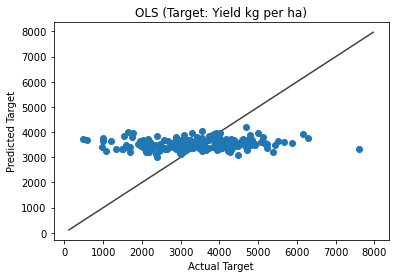

Lasso
MAE on test data: 908.4230230912041
MAE Scaled on test data: 0.2531781186930339


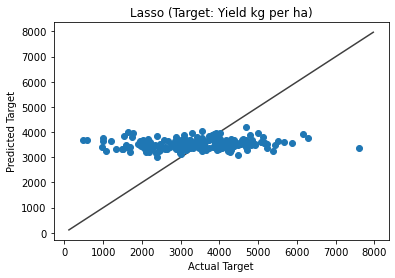

Ridge
MAE on test data: 907.1558104949769
MAE Scaled on test data: 0.25282494567458136


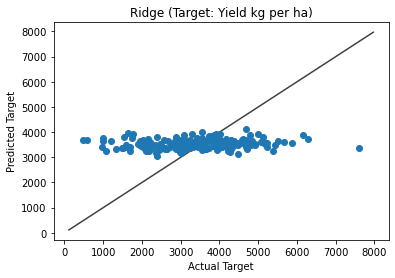

ElasticNet
MAE on test data: 908.4728600608549
MAE Scaled on test data: 0.2531920082906078


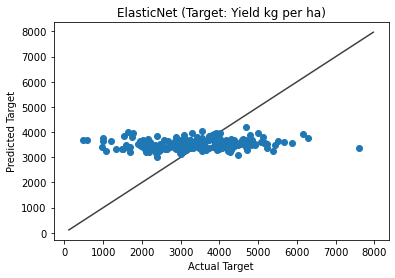

SVR
MAE on test data: 901.0396413752896
MAE Scaled on test data: 0.25112036515210445


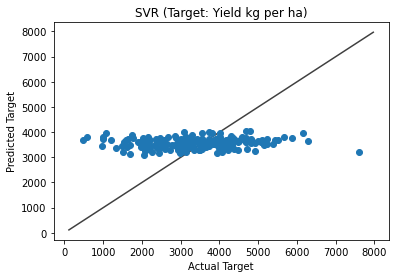

Lightgbm
MAE on test data: 899.7507295776024
MAE Scaled on test data: 0.25076114455134374


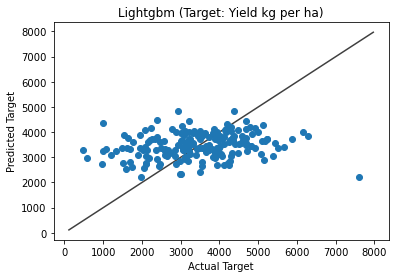

GBR
MAE on test data: 900.0306168478216
MAE Scaled on test data: 0.25083914932524204


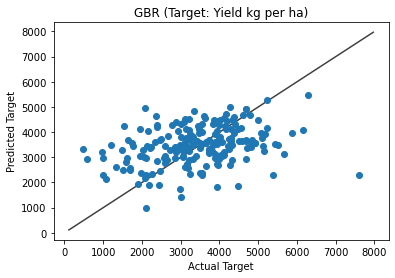

XGBoost
MAE on test data: 828.0648705734677
MAE Scaled on test data: 0.23078224655093632


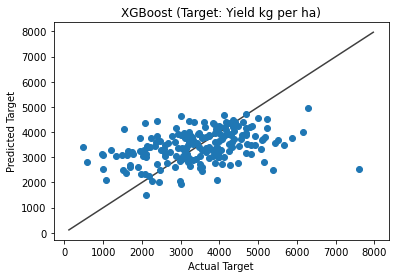

stackgen
MAE on test data: 978.3076038454064
MAE Scaled on test data: 0.23078224655093632


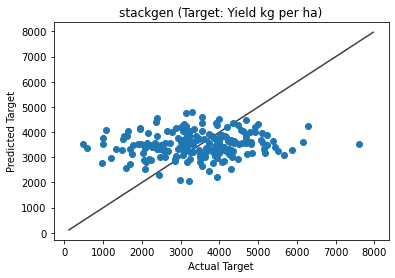

In [26]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

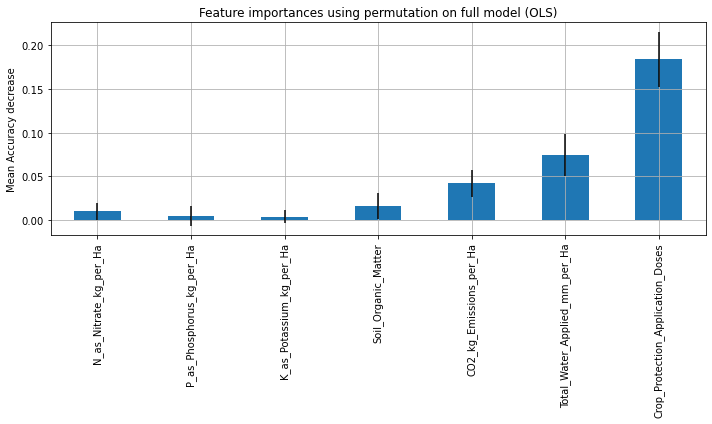

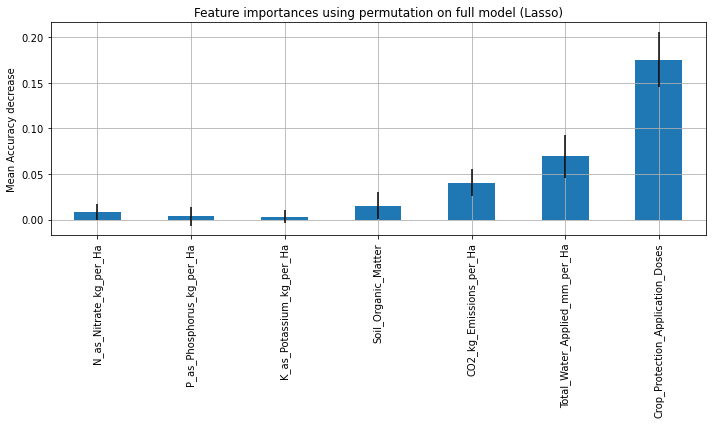

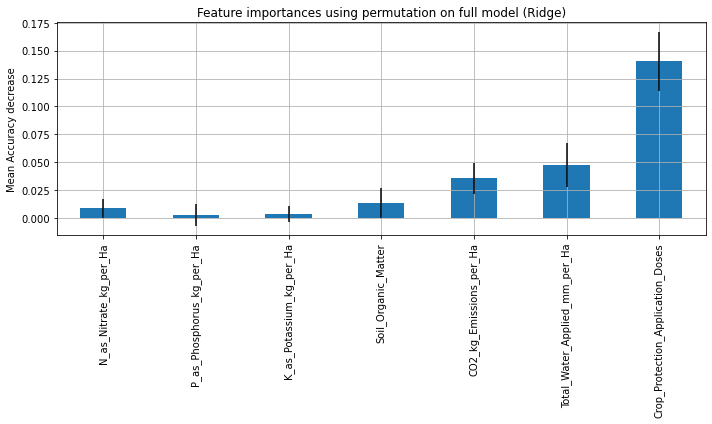

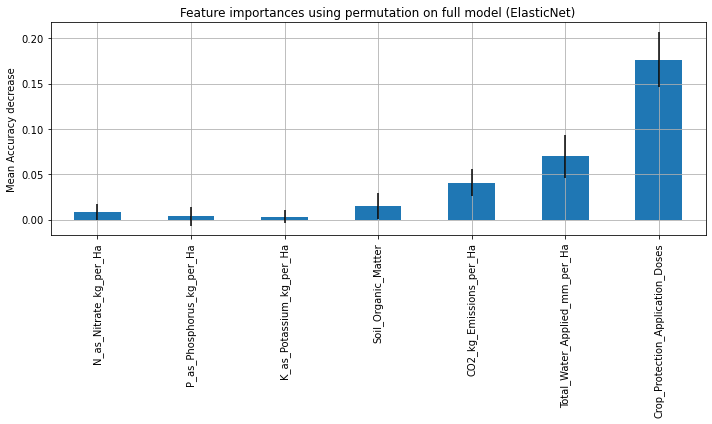

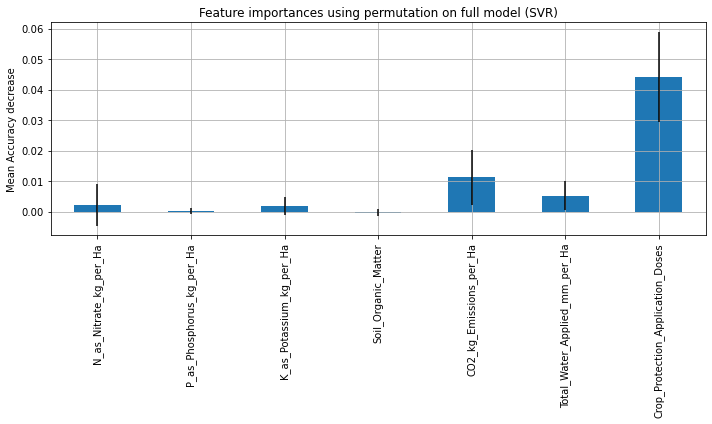

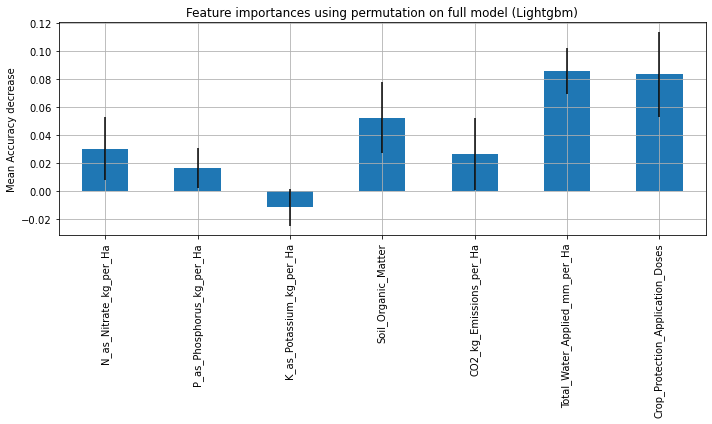

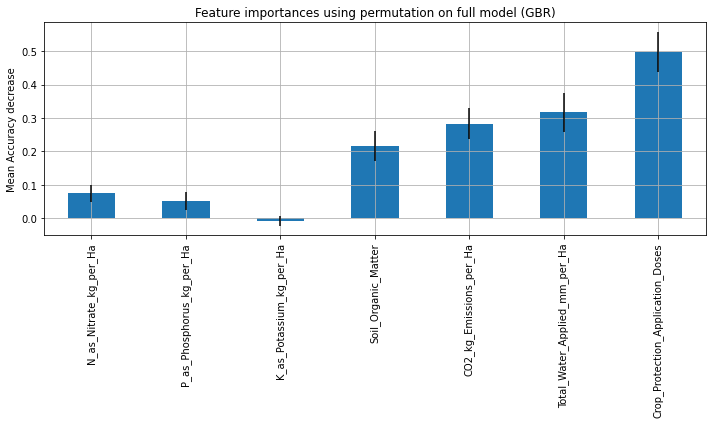

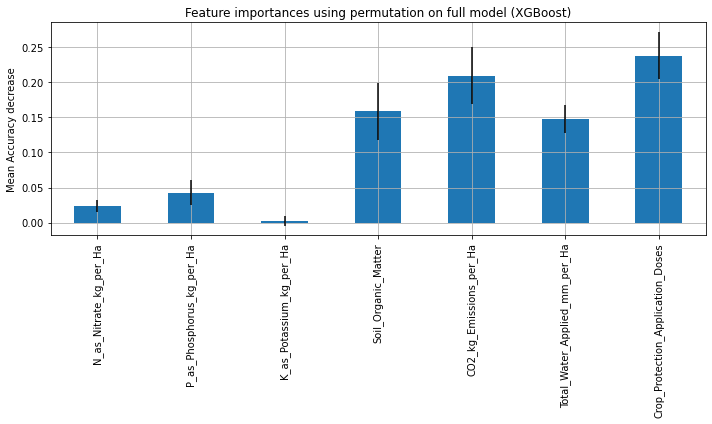

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names

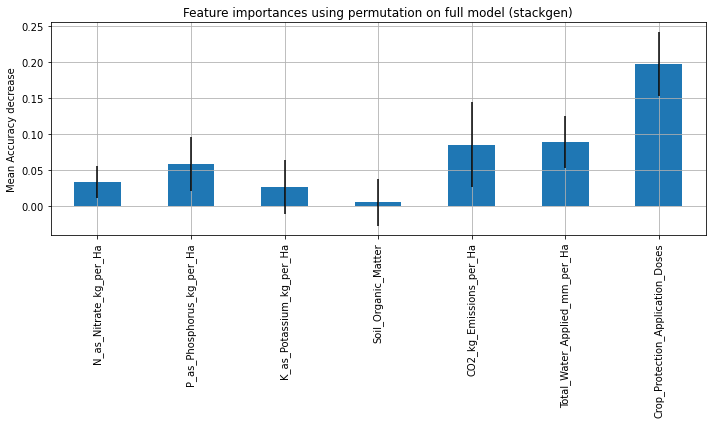

In [27]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Yeo-Johnson and Box Cox Transformation, water column retained
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

In [ ]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                      
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_Yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[6], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                                 
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[8]/mean_Yield_kg_per_ha)

In [118]:
#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

# print(df[df['N_as_Nitrate_kg_per_Ha'] != 0]['N_as_Nitrate_kg_per_Ha'].mean())

# df['N_as_Nitrate_kg_per_Ha'] = df['N_as_Nitrate_kg_per_Ha'].replace([0], [df[df['N_as_Nitrate_kg_per_Ha'] != 0]['N_as_Nitrate_kg_per_Ha'].mean()])
# df['P_as_Phosphorus_kg_per_Ha'] = df['P_as_Phosphorus_kg_per_Ha'].replace([0], [df[df['P_as_Phosphorus_kg_per_Ha'] != 0]['P_as_Phosphorus_kg_per_Ha'].mean()])
# df['K_as_Potassium_kg_per_Ha'] = df['K_as_Potassium_kg_per_Ha'].replace([0], [df[df['K_as_Potassium_kg_per_Ha'] != 0]['K_as_Potassium_kg_per_Ha'].mean()])

#train/test split

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

# plt.figure()
# plt.title('Nitrate')
# plt.hist(np.log(1 + train_Yield_kg_per_ha['N_as_Nitrate_kg_per_Ha']))
# plt.figure()
# plt.title('Phosphorus')
# plt.hist(np.log(1 + train_Yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha']))
# plt.figure()
# plt.title('Potassium')
# plt.hist(np.log(1 + train_Yield_kg_per_ha['K_as_Potassium_kg_per_Ha']))


# train_Yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'] = np.log(1 + train_Yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
# train_Yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'] = np.log(1 + train_Yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
# train_Yield_kg_per_ha['K_as_Potassium_kg_per_Ha'] = np.log(1 + train_Yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])

# test_Yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'] = np.log(1 + test_Yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
# test_Yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'] = np.log(1 + test_Yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
# test_Yield_kg_per_ha['K_as_Potassium_kg_per_Ha'] = np.log(1 + test_Yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])


#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'CO2_kg_Emissions_per_Ha']] = \
standard_scaler_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'CO2_kg_Emissions_per_Ha']] = \
standard_scaler_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'CO2_kg_Emissions_per_Ha']])

# power_transform_X_box_cox = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha']])

# X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha']] = \
# power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha']])

# plt.figure()
# plt.title('Nitrate')
# plt.hist(X_train_yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
# plt.figure()
# plt.title('Phosphorus')
# plt.hist(X_train_yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
# plt.figure()
# plt.title('Potassium')
# plt.hist(X_train_yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])




# power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']])
# power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha']])

# X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']] = \
# power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']])

# X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']] = \
# power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']])

# plt.figure()
# plt.title('Nitrate')
# plt.hist(X_train_yield_kg_per_ha['N_as_Nitrate_kg_per_Ha'])
# plt.figure()
# plt.title('Phosphorus')
# plt.hist(X_train_yield_kg_per_ha['P_as_Phosphorus_kg_per_Ha'])
# plt.figure()
# plt.title('Potassium')
# plt.hist(X_train_yield_kg_per_ha['K_as_Potassium_kg_per_Ha'])

# X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']] = \
# power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter']])

# power_transform_X_yeo_johnson = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']])

# X_train_yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']] = power_transform_X_yeo_johnson.transform(X_train_yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']])

# X_test_yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']] = power_transform_X_yeo_johnson.transform(X_test_yield_kg_per_ha[['CO2_kg_Emissions_per_Ha']])

# plt.figure()
# plt.title('Soil Organic Matter')
# plt.hist(X_train_yield_kg_per_ha['Soil_Organic_Matter'])
# plt.figure()
# plt.title('CO2_kg_Emissions_per_Ha')
# plt.hist(X_train_yield_kg_per_ha['CO2_kg_Emissions_per_Ha'])

# print(display(X_train_yield_kg_per_ha.agg(['skew', 'kurtosis']).transpose()))

#y_values
y_train_yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

y_test_yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

mean_yield_kg_per_ha = y_train_yield_kg_per_ha.mean()

standard_scaler_y = StandardScaler().fit(y_train_yield_kg_per_ha)

y_train_yield_kg_per_ha = standard_scaler_y.transform(y_train_yield_kg_per_ha)
y_test_yield_kg_per_ha = standard_scaler_y.transform(y_test_yield_kg_per_ha)


# power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

# y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)

# y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

# plt.figure()
# plt.hist(y_train_yield_per_ha)

In [49]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
    inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_yield_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[7], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_yield_kg_per_ha, y_train_yield_per_ha))
inv_transform_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1,1)
inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[8].predict(X_test_yield_kg_per_ha).reshape(-1,1))                                              
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_yield_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[16:52:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 901.8026049388084
MAE Scaled on test data: 0.2574879177822757


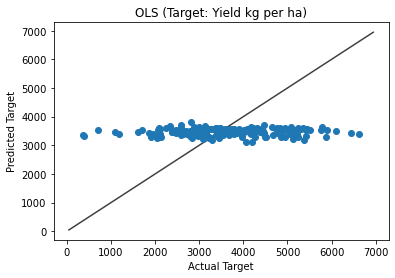

Lasso
MAE on test data: 901.6032321981501
MAE Scaled on test data: 0.25743099171932854


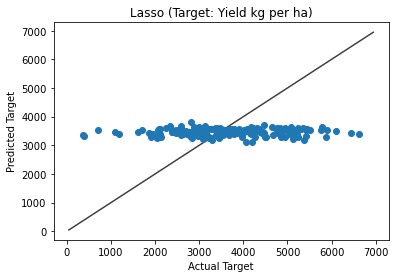

Ridge
MAE on test data: 901.4737734651844
MAE Scaled on test data: 0.25739402790994553


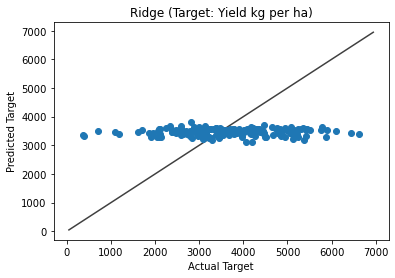

ElasticNet
MAE on test data: 901.6281440533116
MAE Scaled on test data: 0.25743810469691203


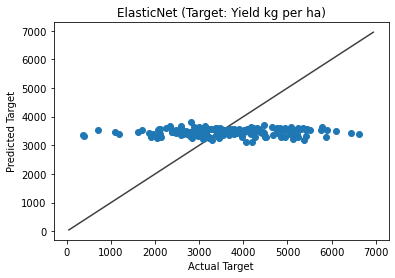

SVR
MAE on test data: 904.9852285566353
MAE Scaled on test data: 0.258396638963553


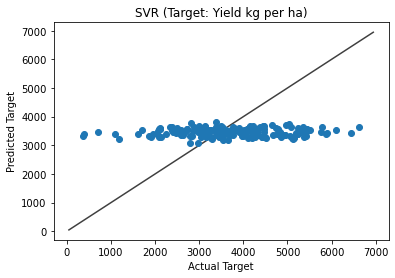

Lightgbm
MAE on test data: 890.3045613679146
MAE Scaled on test data: 0.25420492959680663


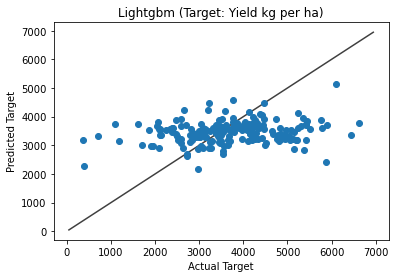

GBR
MAE on test data: 919.6023746260356
MAE Scaled on test data: 0.26257021141135567


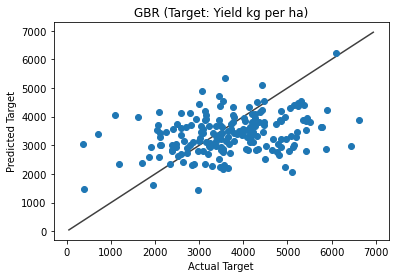

XGBoost
MAE on test data: 868.4521785710308
MAE Scaled on test data: 0.24796551033350497


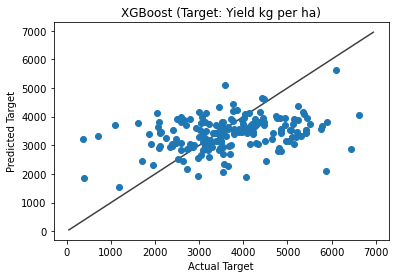

stackgen
MAE on test data: 1014.6327779892628
MAE Scaled on test data: 0.24796551033350497


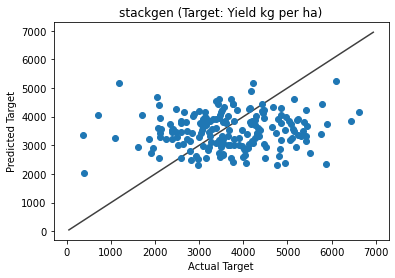

In [51]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = power_transform_y.inverse_transform(y_test_yield_per_ha).reshape(-1, 1)
    inv_transformed_preds = power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_yield_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

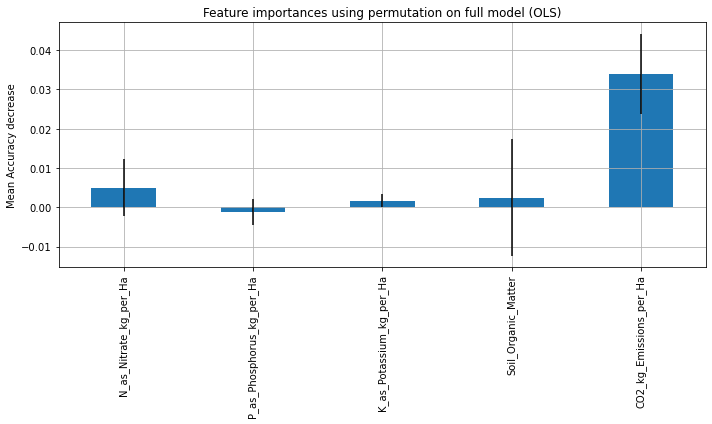

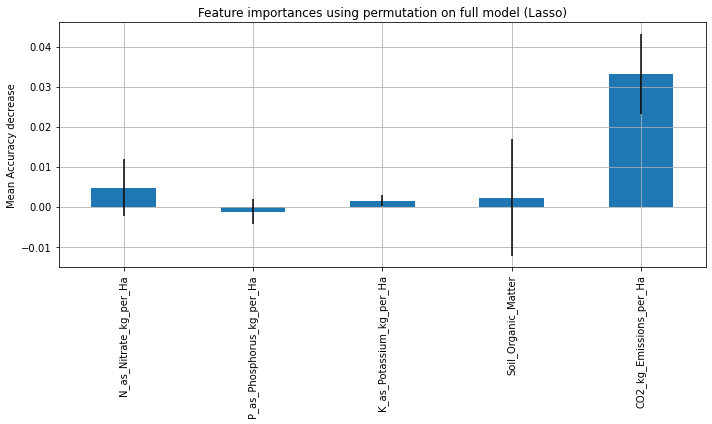

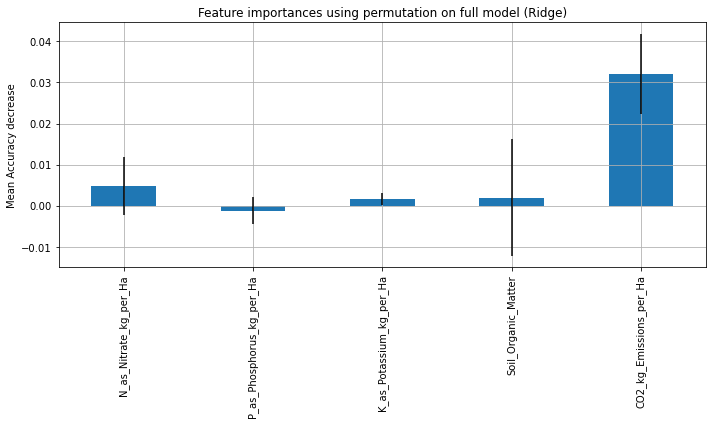

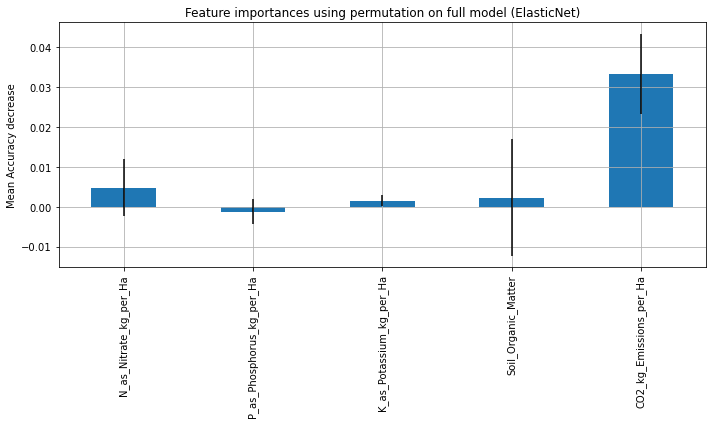

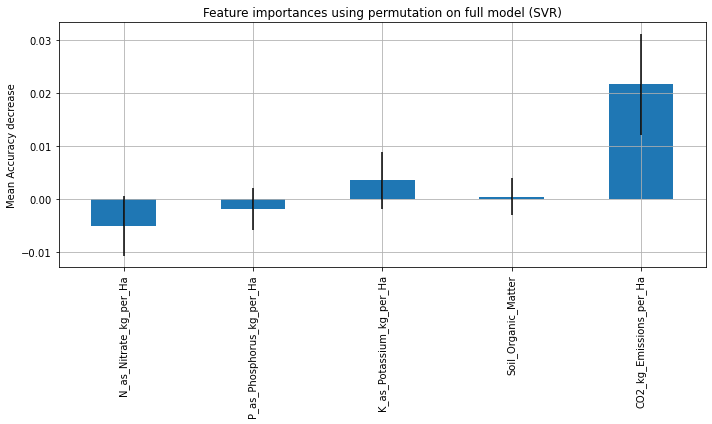

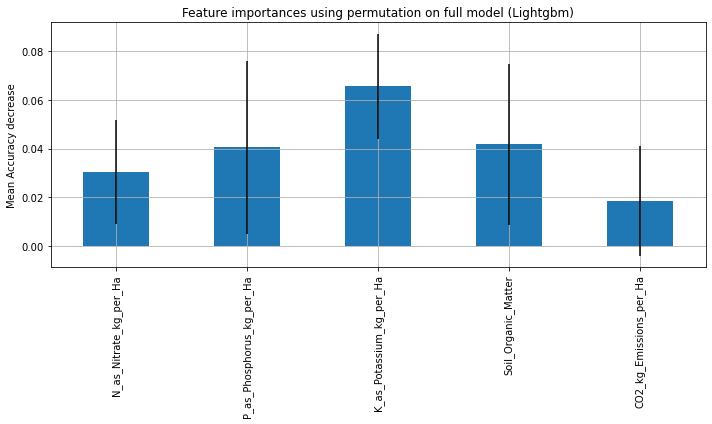

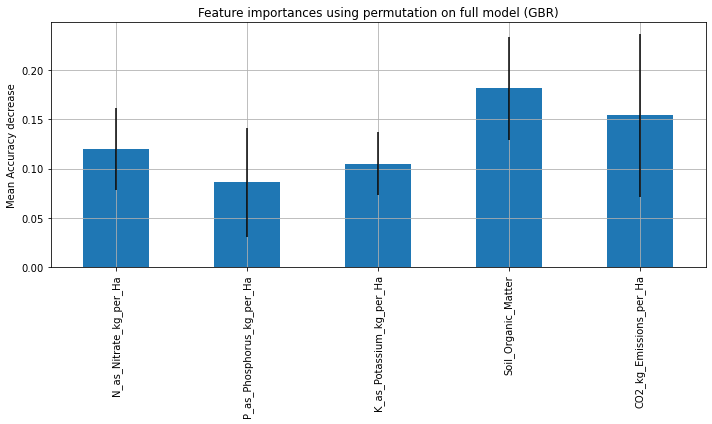

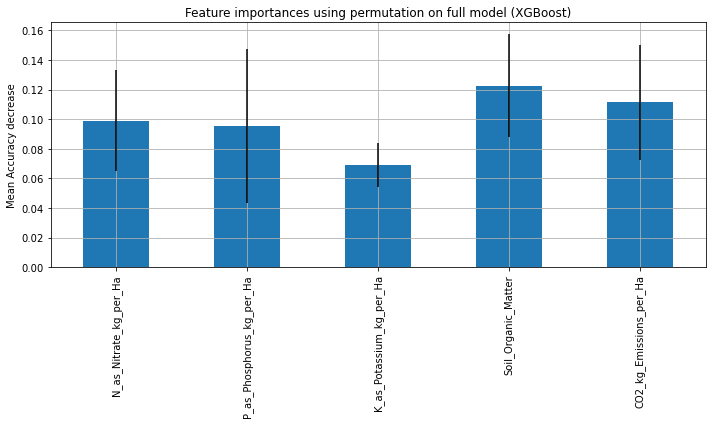

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names

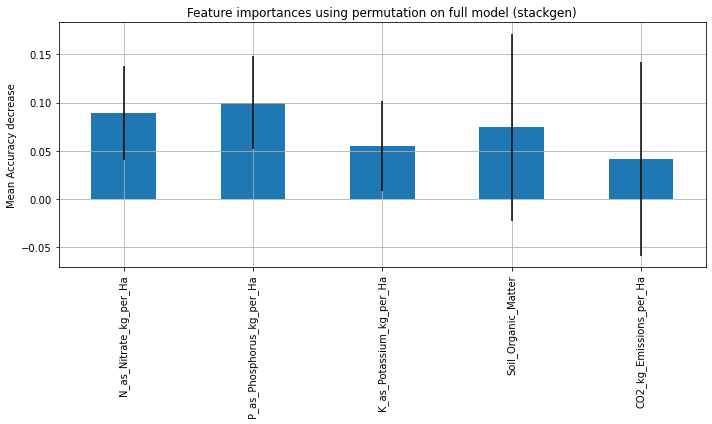

In [52]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = X_train_yield_kg_per_ha.columns

    result = permutation_importance(
        fitted_models[i], X_test_yield_kg_per_ha, y_test_yield_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

N_as_Nitrate_kg_per_Ha  P_as_Phosphorus_kg_per_Ha  \
0                    6000.0                        0.0   
1                    6600.0                        0.0   
2                    6000.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
..                      ...                        ...   
971                     0.0                        0.0   
972                     0.0                        0.0   
973                     0.0                        0.0   
974                     0.0                        0.0   
975                     0.0                        0.0   

     K_as_Potassium_kg_per_Ha  Soil_Organic_Matter  Yield_Mass_kg_Per_Ha  \
0                      6000.0                 2.50           4786.900000   
1                      6600.0                 2.50           5234.476190   
2                      6000.0                 2.50           4358.380952   
3                         0.0                 2.50           3400.400000   
4                         0.0                 2.50           3033.000000   
..                        ...                  ...                   ...   
971                       0.0                 2.69           4587.384615   
972                       0.0                 5.38           6741.676647   
973                       0.0                 5.38           6482.275449   
974                       0.0                 3.75           3372.689076   
975                       0.0                 2.86           4358.666667   

     CO2_kg_Emissions_per_Ha  Total_Water_Applied_mm  \
0                     349.85                     350   
1                     488.41                     350   
2                     462.26                     350   
3                     409.14                     350   
4                     261.38                     350   
..                       ...                     ...   
971                   449.67                     450   
972                 -1035.15                     450   
973                 -1092.21                     450   
974                  -427.99                     450   
975                   417.60                     450   

     Crop_Protection_Application_Doses  
0                                   14  
1                                   18  
2                                   20  
3                                   10  
4                                   15  
..                                 ...  
971                                 16  
972                                 15  
973                                 13  
974                                 15  
975                                 20  

[976 rows x 8 columns]

None
1
0.4365366837639895


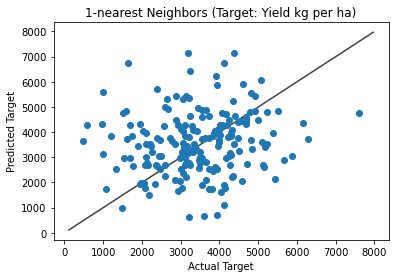

2
0.386349770262722


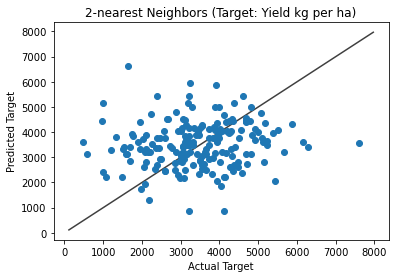

3
0.3467219943357312


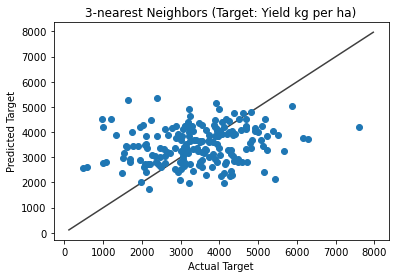

4
0.3327145679947518


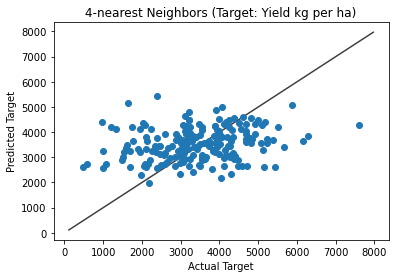

5
0.3323052531092857


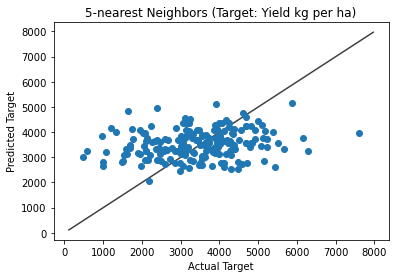

6
0.32721767758459797


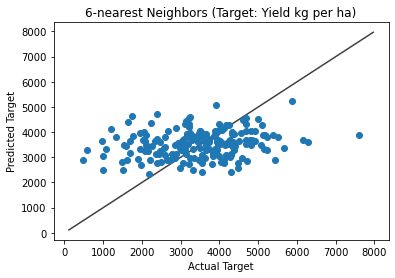

7
0.3325704341080782


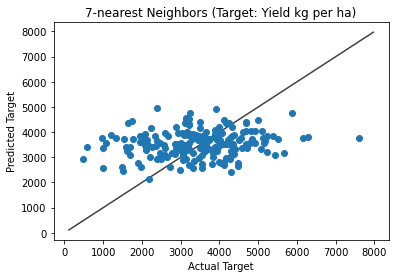

8
0.33171014869072024


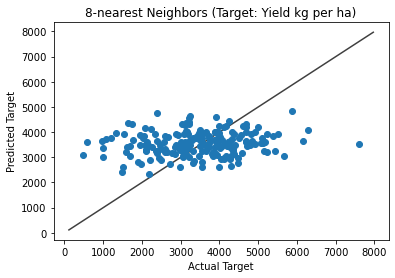

9
0.3281537724377368


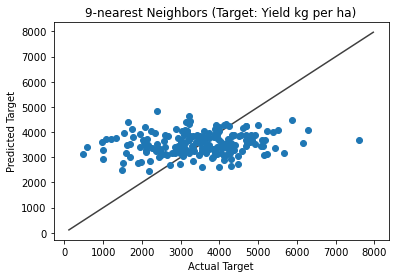

10
0.32487114537296413


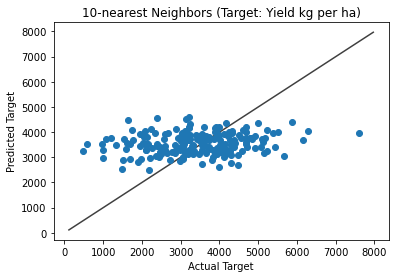

11
0.3224192041120944


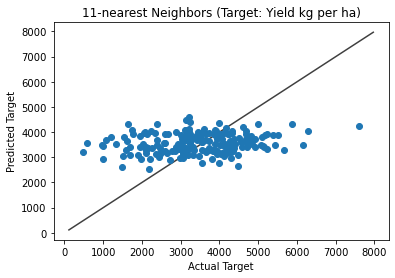

12
0.3214150812998889


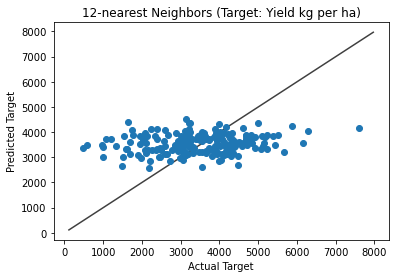

13
0.3191224559767696


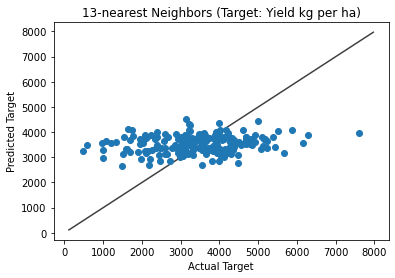

14
0.3173689951270871


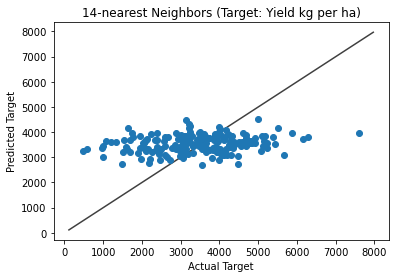

15
0.3169433160804968


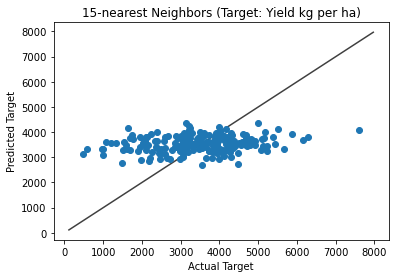

16
0.3178485097160377


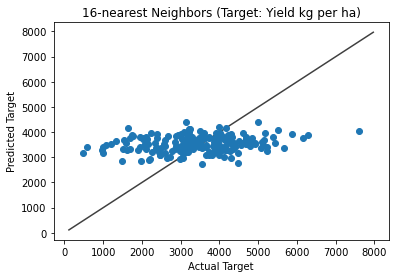

17
0.31766723194305846


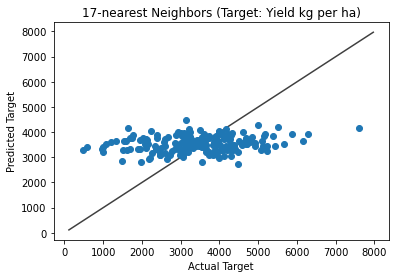

18
0.31952868127199924


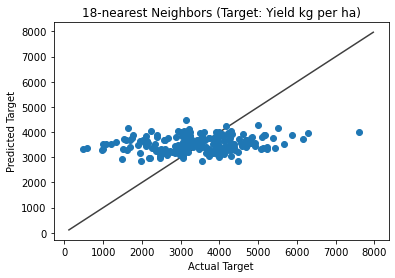

19
0.32025065243098083


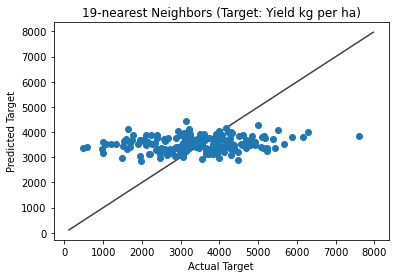

20
0.3214603213461251


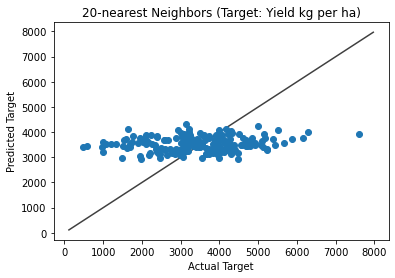

21
0.32181383443512257


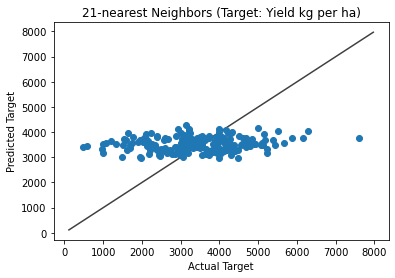

22
0.32324880347750856


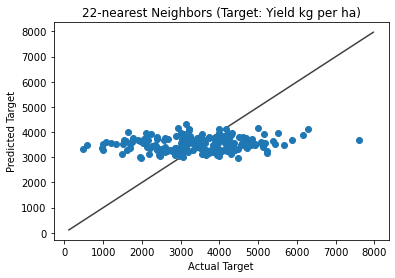

23
0.3262124316752697


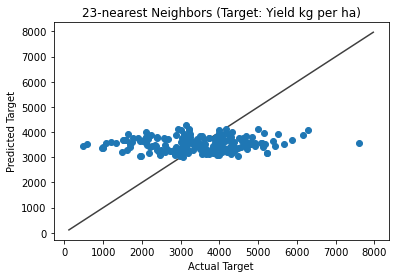

24
0.32638732668670367


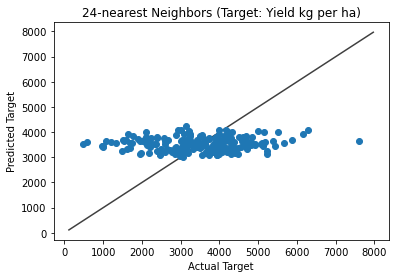

In [7]:
#K nearest neighbors (standard normal scaled data)

#Yeo-Johnson and Box Cox Transformation, water column retained
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

print(display(df))

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])
X_test_yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_Mass_kg_Per_Ha'])

power_transform_X = PowerTransformer(standardize = True).fit(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_train_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']] = \
power_transform_X.transform(X_test_yield_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'CO2_kg_Emissions_per_Ha']])

power_transform_X_box_cox = PowerTransformer(standardize = True, method = 'box-cox').fit(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_train_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']] = \
power_transform_X_box_cox.transform(X_test_yield_kg_per_ha[['Soil_Organic_Matter', 'Crop_Protection_Application_Doses', 'Total_Water_Applied_mm']])

#y_values
y_train_yield_per_ha = np.array(train_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)
mean_Yield_kg_per_ha = y_train_yield_per_ha.mean()
y_test_yield_per_ha = np.array(test_Yield_kg_per_ha['Yield_Mass_kg_Per_Ha']).reshape(-1, 1)

power_transform_y = PowerTransformer(standardize = True, method = 'box-cox').fit(y_train_yield_per_ha)

y_train_yield_per_ha = power_transform_y.transform(y_train_yield_per_ha)
y_test_yield_per_ha = power_transform_y.transform(y_test_yield_per_ha)

from sklearn.neighbors import KNeighborsRegressor

k_values = np.arange(1,25,1)

for k in k_values:
    print(str(k))
    neigh = KNeighborsRegressor(n_neighbors = k)
    neigh.fit(X_train_yield_kg_per_ha, y_train_yield_per_ha)
    print(rmse(power_transform_y.inverse_transform(neigh.predict(X_test_yield_kg_per_ha)), power_transform_y.inverse_transform(y_test_yield_per_ha))/mean_Yield_kg_per_ha)
    fig, ax = plt.subplots()
    ax.scatter(power_transform_y.inverse_transform(y_test_yield_per_ha), power_transform_y.inverse_transform(neigh.predict(X_test_yield_kg_per_ha)))
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(str(k) + '-nearest Neighbors (Target: Yield kg per ha)')
    plt.show()    

(array([566.,  10.,  26.,  13.,  37.,  27.,  25.,  35.,   6.,   4.]),
 array([0.41692304, 0.57017092, 0.7234188 , 0.87666668, 1.02991456,
        1.18316245, 1.33641033, 1.48965821, 1.64290609, 1.79615397,
        1.94940185]),
 <BarContainer object of 10 artists>)

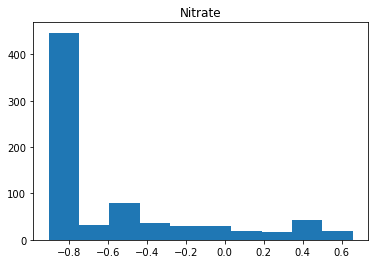

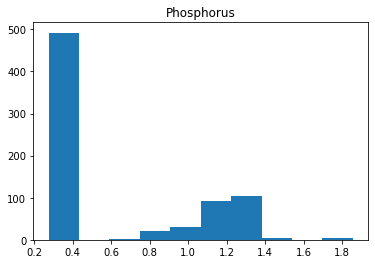

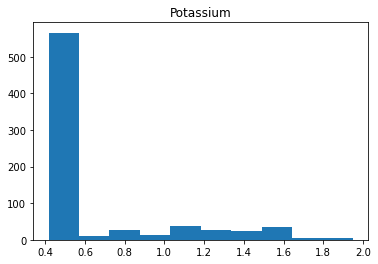

In [151]:
#Using CO2 prediction model to find yield

#K nearest neighbors (standard normal scaled data)
df = pd.read_csv('/mnt/Datasets/merged_dataframe_11_30_2022.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

#train/test split
train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 50)

#x values
X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_Emissions_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_Emissions_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'Yield_Mass_kg_Per_Ha']])

X_train_CO2_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'Yield_Mass_kg_Per_Ha']] = \
standard_scaler_X.transform(X_train_CO2_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'Yield_Mass_kg_Per_Ha']])

X_test_CO2_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'Yield_Mass_kg_Per_Ha']] = \
standard_scaler_X.transform(X_test_CO2_kg_per_ha[['N_as_Nitrate_kg_per_Ha','P_as_Phosphorus_kg_per_Ha', 'K_as_Potassium_kg_per_Ha', 'Soil_Organic_Matter', 'Yield_Mass_kg_Per_Ha']])

#y values
y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_Emissions_per_Ha']).reshape(-1, 1)
y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_Emissions_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

standard_scaler_y = StandardScaler().fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)
y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

In [131]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_Scaled_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1)
    inv_transformed_preds = standard_scaler_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_CO2_kg_per_ha)
                                                                                                    
#stacked model
model_names.append('stackgen')
models.append(StackingCVRegressor(regressors = (models[0], models[1], models[2], models[3], models[4], models[5], models[6], models[7]), meta_regressor = models[7], use_features_in_secondary = True))
fitted_models.append(models[8].fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
inv_transform_y_actuals = standard_scaler_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1,1)
inv_transformed_preds = standard_scaler_y.inverse_transform(fitted_models[8].predict(X_test_CO2_kg_per_ha).reshape(-1,1))                                              
Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
Test_Scaled_MAE_models.append(Test_MAE_models[models.index(model)]/mean_CO2_kg_per_ha)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[20:57:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

OLS
MAE on test data: 552.1965557031102
MAE Scaled on test data: 1.3668512539373587


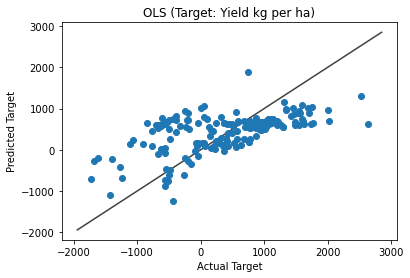

Lasso
MAE on test data: 552.2998476567725
MAE Scaled on test data: 1.3671069323455756


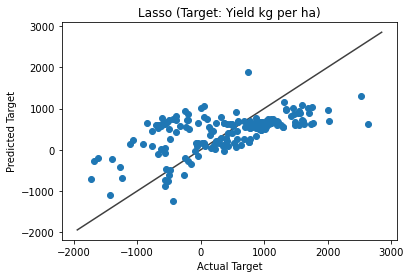

Ridge
MAE on test data: 553.2162677967236
MAE Scaled on test data: 1.3693753456569022


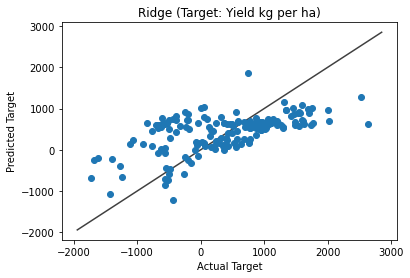

ElasticNet
MAE on test data: 552.286614620366
MAE Scaled on test data: 1.3670741766316565


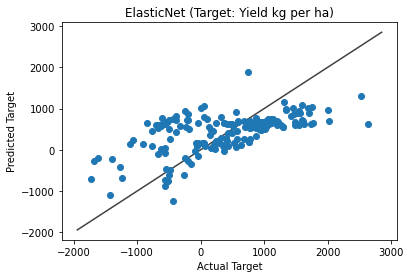

SVR
MAE on test data: 532.0577690780932
MAE Scaled on test data: 1.3170017475127276


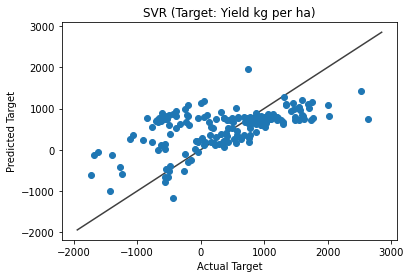

Lightgbm
MAE on test data: 520.6909926402805
MAE Scaled on test data: 1.288865583918829


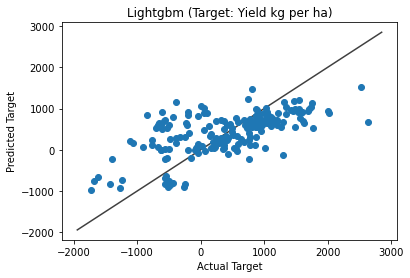

GBR
MAE on test data: 499.3884099867285
MAE Scaled on test data: 1.2361353350402635


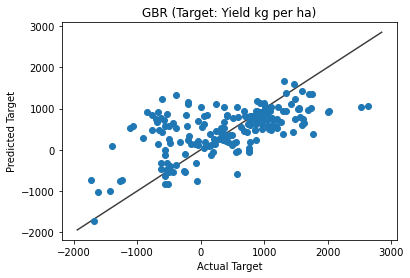

XGBoost
MAE on test data: 506.33965115648635
MAE Scaled on test data: 1.253341731225054


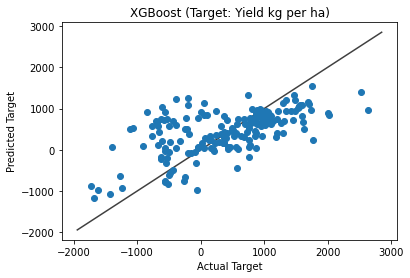

stackgen
MAE on test data: 521.6332367556653
MAE Scaled on test data: 1.253341731225054


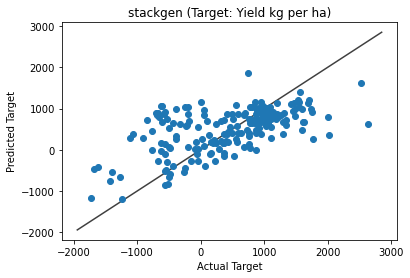

In [132]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('MAE Scaled on test data: ' + str(Test_Scaled_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1)
    inv_transformed_preds = standard_scaler_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1))
    fig, ax = plt.subplots()
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.show()

In [197]:
coef = fitted_models[0].coef_
intercept = fitted_models[0].intercept_
backsolve_df = X_test_CO2_kg_per_ha.to_numpy()[:,:-1]

print(y_test_CO2_kg_per_ha.shape)
print(np.array([np.sum(np.multiply(backsolve_df, coef[0][0:4], backsolve_df), axis = 1)]).T.shape)
print(intercept.shape)

print(mae(standard_scaler_y.inverse_transform((y_test_CO2_kg_per_ha - intercept - np.array([np.sum(np.multiply(backsolve_df, coef[0][0:4], backsolve_df), axis = 1)]).T)/coef[0][4]), backsolve_df[-1]))

# print(y_test_CO2_kg_per_ha - intercept - np.matmul(coef[0][0:4], backsolve_df))

# print((y_test_CO2_kg_per_ha - np.sum(np.multiply(coef[0][0:4], backsolve_df), axis = 0) - intercept)/coef[0][-1])


(188, 1)
(188, 1)
(1,)
10313.240545884948
